In [3]:
import os
import re
import glob

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [4]:
OCED_EPS_FILE="./data/oecd_eps.csv"
PARLAMINT_DIR="/Volumes/lhe-drive-1/datasets/ParlaMint-5.0"
REDUCED_PARLAMINT_DIR = "/Volumes/lhe-drive-1/datasets/ParlaMint-5.0-Reduced"

# ParlaMint Datensatz
https://www.clarin.eu/parlamint
Reden in Parlamenten von verschiedenen Ländern

In [5]:
all_speeches_df = pd.read_csv(f"{REDUCED_PARLAMINT_DIR}/all_speeches.csv")
all_speeches_df.iloc[0]

/var/folders/2p/pyn18v1x4wj1wqxyg2035jcr0000gn/T/ipykernel_96730/1983145719.py:1: DtypeWarning: Columns (5,6,7,8,22) have mixed types. Specify dtype option on import or set low_memory=False.
  all_speeches_df = pd.read_csv(f"{REDUCED_PARLAMINT_DIR}/all_speeches.csv")


Text_ID                                    ParlaMint-HR-en_2017-12-12-0
ID                                     ParlaMint-HR_2017-12-12-0.u56065
Title                 Minutes of the National Assembly of the Republ...
Date                                                         2017-12-12
Body                                                      Unicameralism
Term                                                          9. mandat
Session                                                               -
Meeting                                                     Zasedanje 6
Sitting                                                      2017-12-15
Agenda                                                                -
Subcorpus                                                     Reference
Lang                                                            English
Speaker_role                                                    Regular
Speaker_MP                                                      

In [4]:
all_speeches_df['country'].unique()

array(['HR', 'CZ', 'TR', 'ES-PV', 'SI', 'SE', 'FI', 'RS', 'AT', 'ES',
       'NO', 'IT', 'DK', 'EE', 'PL', 'BA', 'FR', 'PT', 'IS', 'LV', 'GR',
       'ES-CT', 'HU', 'GB', 'BG', 'ES-GA', 'UA', 'BE', 'NL'], dtype=object)

In [5]:
all_speeches_df['Topic'].unique()

array(['Other', 'Foreign Trade', 'International Affairs', 'Mix',
       'Culture', 'Housing', 'Education', 'Domestic Commerce',
       'Government Operations', 'Macroeconomics', 'Energy', 'Agriculture',
       'Immigration', 'Labor', 'Law and Crime', 'Technology',
       'Civil Rights', 'Defense', 'Health', 'Social Welfare',
       'Environment', 'Transportation', 'Public Lands', nan, '-'],
      dtype=object)

# OECD EPS Dataset
Paper: https://doi.org/10.1787/90ab82e8-en
Download: https://data-explorer.oecd.org/vis?tenant=archive&df[ds]=DisseminateArchiveDMZ&df[id]=DF_EPS&df[ag]=OECD&dq=.&pd=%2C&to[TIME_PERIOD]=false&vw=tb
Bewertung der aktuellen Klimagesetze eines Landes

In [6]:
eps_df = pd.read_csv(OCED_EPS_FILE)
eps_df.iloc[0]

STRUCTURE                                              DATAFLOW
STRUCTURE_ID                                   OECD:DF_EPS(1.0)
STRUCTURE_NAME            Environmental Policy Stringency Index
ACTION                                                        I
COU                                                         FRA
Country                                                  France
VAR                                                   FIT_SOLAR
Variable                 Solar Energy support (Auctions & FITs)
TIME_PERIOD                                                1990
Year                                                        NaN
OBS_VALUE                                                   0.0
Observation Value                                           NaN
OBS_STATUS                                                    A
Observation Status                                          NaN
UNIT_MEASURE                                                NaN
Unit of Measures                        

40 Länder gefunden
Jahre gefunden: 1990 - 2020


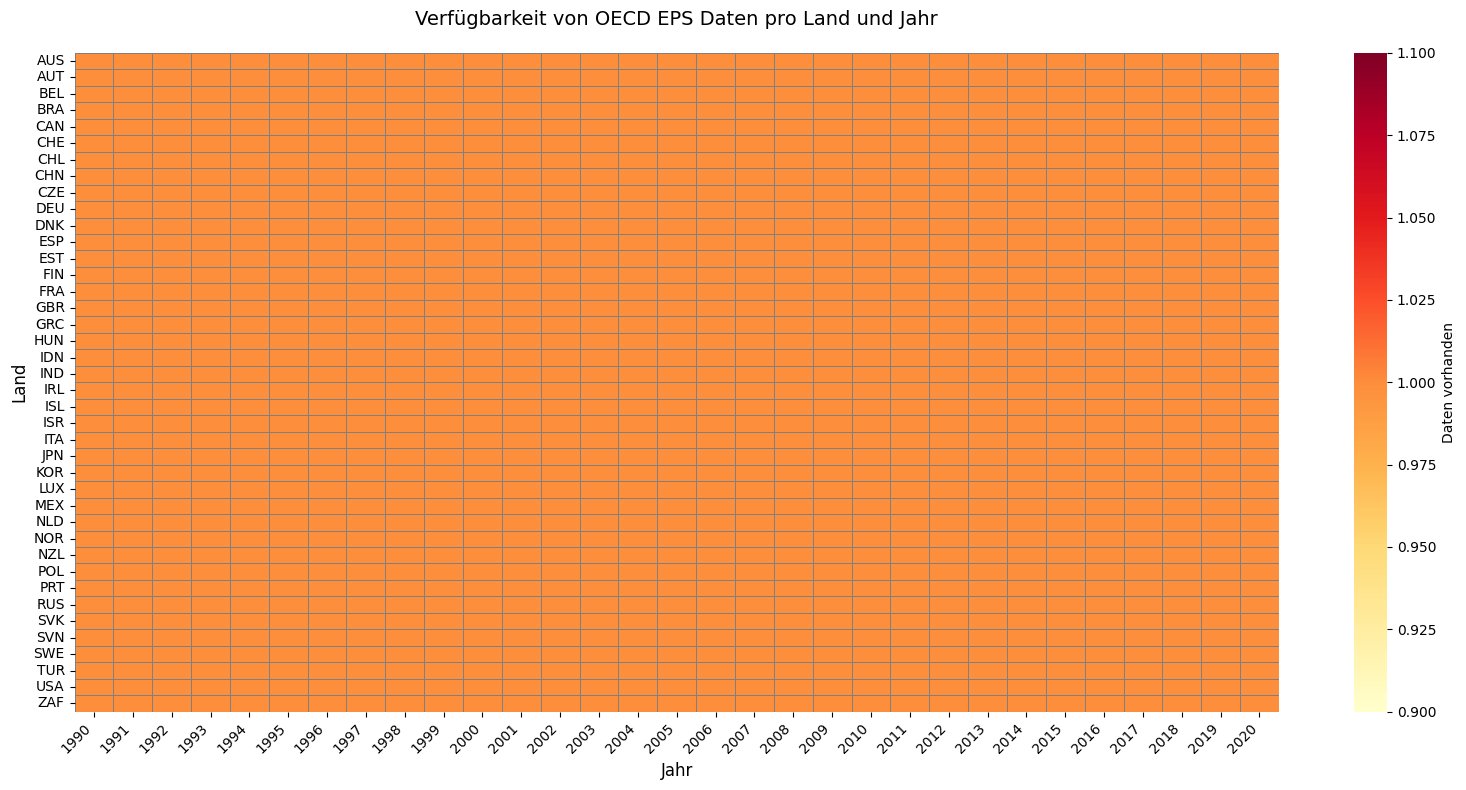

In [7]:
# Extrahiere alle eindeutigen Länder und Jahre aus eps_df
countries = sorted(eps_df['COU'].unique())
years = sorted(eps_df['TIME_PERIOD'].unique())

print(f"{len(countries)} Länder gefunden")
print(f"Jahre gefunden: {years[0]} - {years[-1]}")

# Erstelle Matrix für Datenverfügbarkeit
matrix = np.zeros((len(countries), len(years)))

for i, country in enumerate(countries):
    for j, year in enumerate(years):
        # Prüfe ob Daten für dieses Land und Jahr vorhanden sind
        has_data = len(eps_df[(eps_df['COU'] == country) & 
                               (eps_df['TIME_PERIOD'] == year) & 
                               (eps_df['OBS_VALUE'].notna())]) > 0
        if has_data:
            matrix[i, j] = 1

# Erstelle HeatMap
plt.figure(figsize=(16, 8))
sns.heatmap(
    matrix,
    xticklabels=years,
    yticklabels=countries,
    cmap="YlOrRd",
    cbar_kws={"label": "Daten vorhanden"},
    linewidths=0.5,
    linecolor="gray",
)

plt.xlabel("Jahr", fontsize=12)
plt.ylabel("Land", fontsize=12)
plt.title("Verfügbarkeit von OECD EPS Daten pro Land und Jahr", fontsize=14, pad=20)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [8]:
eps_df['Variable'].value_counts()

Variable
Solar Energy support (Auctions & FITs)    1240
Carbon dioxides (CO2) Tax                 1240
Renewable Energy Trading Scheme           1240
Environmental Policy Stringency           1240
Emission limit value sulphur              1240
Emission limit value NOx                  1240
Low-carbon R&D expenditures               1240
Diesel tax                                1240
CO2 Trading Scheme                        1240
Nitrogen Oxides (NOx) Tax                 1240
Non-market based policies                 1240
Wind Energy support (Auctions & FITs)     1240
Emission limit value PM                   1240
Emission limit value SOx                  1240
Market based policies                     1240
Sulphur Oxides (SOx) Tax                  1240
Technology support policies               1240
Name: count, dtype: int64

In [9]:
result_df = eps_df[(eps_df['Variable'] == "Market based policies") & (eps_df['TIME_PERIOD'].isin(range(2017, 2023)))].groupby(by=["Country", "TIME_PERIOD"]).agg({
  "OBS_VALUE": "mean"
})
result_df

OBS_VALUE
Country        TIME_PERIOD           
Australia      2017          1.500000
               2018          1.833333
               2019          1.833333
               2020          2.000000
Austria        2017          0.833333
...                               ...
United Kingdom 2020          2.333333
United States  2017          1.166667
               2018          1.000000
               2019          1.000000
               2020          1.333333

[160 rows x 1 columns]

In [10]:
# Ich hatte überlegt den durchschnitt einfach als Wert zu übernehmen, damit man den Zeitraum 2017-22
# für die Auswertung der Reden nehmen kann. Die Abweichung zwischen den Jahren innerhalb eines Landes
# beträgt durchschnittlich nur 0,4 bzw. maximal 1,2. Man könnte natürlich auch extrapolieren und für
# 2021 und 22 den Wert von 2020 nehmen. Naja, aber am besten wäre wahrscheinlich nur die Jahre 17-20
# in die Analyse zu übernehmen.
tmp_df = result_df.groupby(by="Country").agg({"OBS_VALUE": ["min", "max"]}).reset_index()
tmp_df.columns = ['Country', 'min', 'max']
tmp_df["diff"] = tmp_df["max"] - tmp_df["min"]
tmp_df["diff"].describe()

count    40.000000
mean      0.391667
std       0.240340
min       0.000000
25%       0.166667
50%       0.333333
75%       0.500000
max       1.166666
Name: diff, dtype: float64

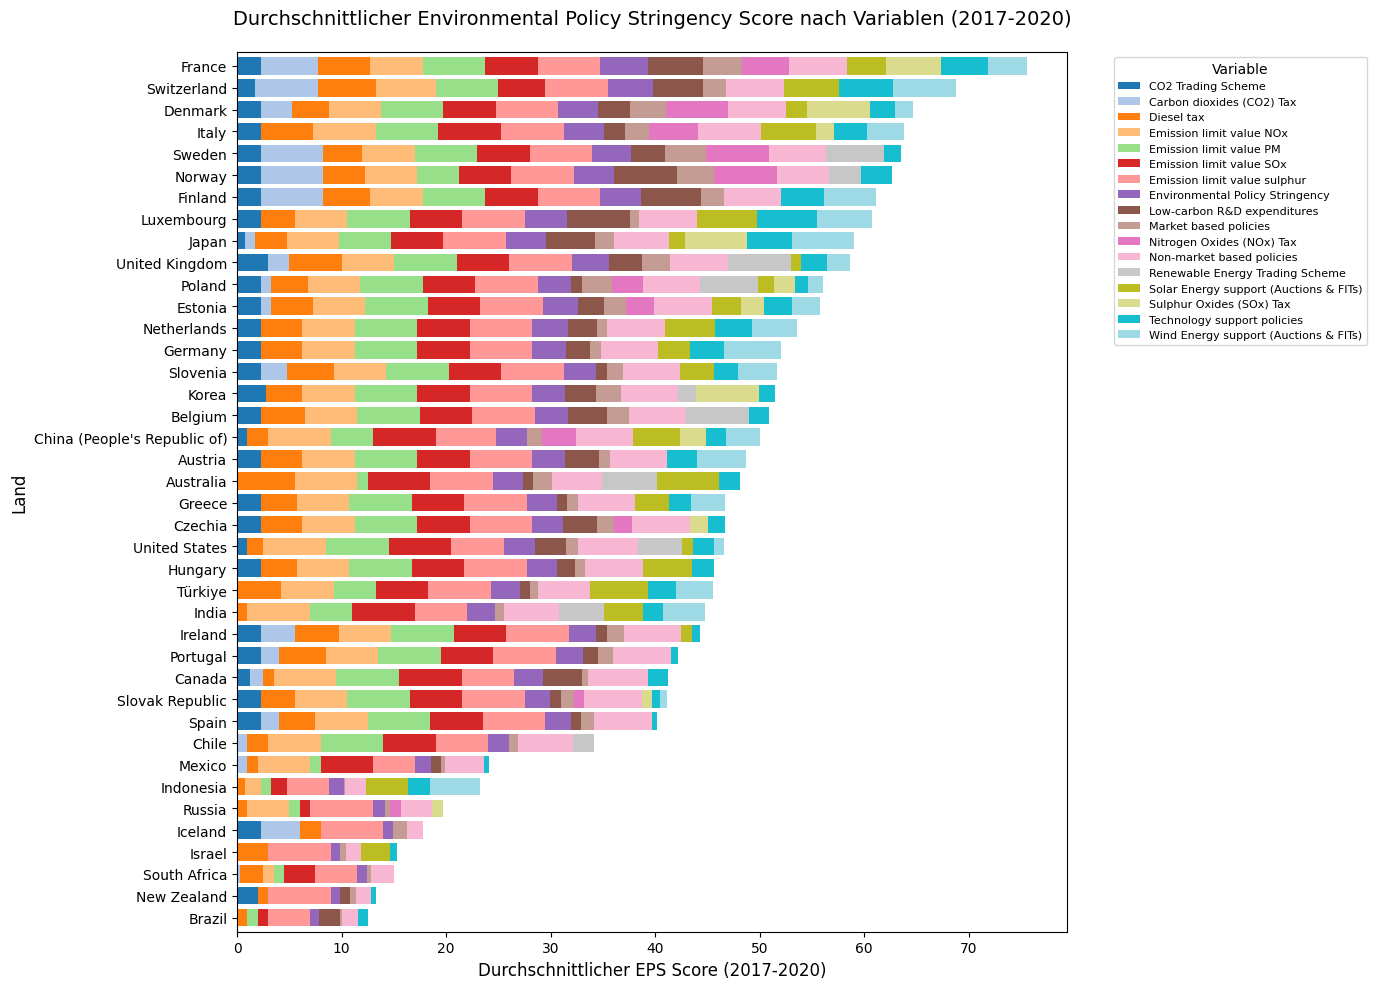

In [11]:
# Filtere Daten für 2017-2020 und berechne Durchschnitt pro Land und Variable
filtered_df = eps_df[(eps_df['TIME_PERIOD'] >= 2017) & (eps_df['TIME_PERIOD'] <= 2020)]

# Berechne Durchschnitt pro Land und Variable
avg_scores = filtered_df.groupby(['Country', 'Variable'])['OBS_VALUE'].mean().reset_index()

# Pivot für gestacktes Balkendiagramm
pivot_data = avg_scores.pivot(index='Country', columns='Variable', values='OBS_VALUE')

# Sortiere Länder nach Gesamtscore (optional)
pivot_data['Total'] = pivot_data.sum(axis=1)
pivot_data = pivot_data.sort_values('Total', ascending=True)
pivot_data = pivot_data.drop('Total', axis=1)

# Erstelle gestacktes Balkendiagramm
fig, ax = plt.subplots(figsize=(14, 10))

pivot_data.plot(
    kind='barh',
    stacked=True,
    ax=ax,
    colormap='tab20',
    width=0.8
)

plt.xlabel('Durchschnittlicher EPS Score (2017-2020)', fontsize=12)
plt.ylabel('Land', fontsize=12)
plt.title('Durchschnittlicher Environmental Policy Stringency Score nach Variablen (2017-2020)', 
          fontsize=14, pad=20)
plt.legend(title='Variable', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.tight_layout()
plt.savefig(f"eps_stacked_bar.png", dpi=300, bbox_inches='tight')
plt.show()

In [7]:
country_mapper = {
    'AT': 'Austria',
    'BE': 'Belgium',
    'BG': 'Bulgaria',
    'HR': 'Croatia',
    'CZ': 'Czechia',
    'DK': 'Denmark',
    'EE': 'Estonia',
    'FI': 'Finland',
    'FR': 'France',
    'DE': 'Germany',
    'GR': 'Greece',
    'HU': 'Hungary',
    'IS': 'Iceland',
    'IT': 'Italy',
    'LV': 'Latvia',
    'NL': 'Netherlands',
    'NO': 'Norway',
    'PL': 'Poland',
    'PT': 'Portugal',
    'RS': 'Serbia',
    'SI': 'Slovenia',
    'ES': 'Spain',
    'SE': 'Sweden',
    'TR': 'Türkiye',
    'GB': 'United Kingdom',
    'UA': 'Ukraine',
    'BA': 'Bosnia and Herzegovina',
    # Spanische Regionen -> Spanien
    'ES-PV': 'Spain',
    'ES-CT': 'Spain',
    'ES-GA': 'Spain',
}

all_speeches_filtered = all_speeches_df[
    (all_speeches_df['year'] >= 2017) & (all_speeches_df['year'] <= 2020)
].copy()

eps_filtered = eps_df[
    (eps_df['TIME_PERIOD'] >= 2017) & (eps_df['TIME_PERIOD'] <= 2020)
].copy()

# Mappe ParlaMint Ländercodes zu vollen Namen
all_speeches_filtered['country_full'] = all_speeches_filtered['country'].map(country_mapper)

# Berechne EPS Score pro Land und Jahr (Summe über alle Variablen)
eps_yearly = eps_filtered.groupby(['Country', 'TIME_PERIOD'])['OBS_VALUE'].sum().reset_index()
eps_yearly.columns = ['Country', 'year', 'EPS_Score']

# Merge beide DataFrames auf Land UND Jahr
merged_df = all_speeches_filtered.merge(
    eps_yearly,
    left_on=['country_full', 'year'],
    right_on=['Country', 'year'],
    how='left'
)
merged_df = merged_df[merged_df["Country"].notna()]
merged_df['EPS_category'] = pd.qcut(merged_df['EPS_Score'], q=3, labels=['low', 'mid', 'high'])
merged_df.iloc[0]

Text_ID                ParlaMint-CZ-en_2017-12-12-ps2017-004-01-014-026
ID                     ParlaMint-CZ_2017-12-12-ps2017-004-01-014-026.u1
Title                 Parliament of the Czech Republic, Chamber of D...
Date                                                         2017-12-12
Body                                                        Lower house
Term                                                             ps2017
Session                                                               -
Meeting                                                      ps2017/004
Sitting                                                   ps2017/004/01
Agenda                                                                -
Subcorpus                                                     Reference
Lang                                                            English
Speaker_role                                                Chairperson
Speaker_MP                                                      

In [13]:
merged_df['Country'].unique()

array(['Czechia', 'Türkiye', 'Spain', 'Slovenia', 'Sweden', 'Finland',
       'Austria', 'Norway', 'Italy', 'Denmark', 'Estonia', 'Poland',
       'France', 'Portugal', 'Iceland', 'Greece', 'Hungary',
       'United Kingdom', 'Belgium', 'Netherlands'], dtype=object)

# CHES dataset
https://www.chesdata.eu/ches-europe
Umfrage wie sich verschiedene Parteien in europäischen Ländern positionieren

In [15]:
ches_df = pd.read_csv("./data/1999-2024_CHES_dataset_means.csv")
country_mapping = {
    1: "Belgium", 2: "Denmark", 3: "Germany", 4: "Greece", 5: "Spain",
    6: "France", 7: "Ireland", 8: "Italy", 10: "Netherlands", 11: "United Kingdom",
    12: "Portugal", 13: "Austria", 14: "Finland", 16: "Sweden", 20: "Bulgaria",
    21: "Czech Republic", 22: "Estonia", 23: "Hungary", 24: "Latvia", 
    25: "Lithuania", 26: "Poland", 27: "Romania", 28: "Slovakia", 
    29: "Slovenia", 31: "Croatia", 37: "Malta", 38: "Luxembourg", 40: "Cyprus"
}
ches_df['country_name'] = ches_df['country'].map(country_mapping)
print(ches_df.columns)
ches_df.iloc[0]

Index(['year', 'country', 'eastwest', 'eumember', 'party_id', 'party',
       'cmp_id', 'vote', 'seat', 'electionyear', 'epvote', 'family', 'govt',
       'lrgen', 'lrecon', 'lrecon_salience', 'lrecon_dissent', 'lrecon_blur',
       'galtan', 'galtan_salience', 'galtan_dissent', 'galtan_blur',
       'eu_position', 'eu_salience', 'eu_dissent', 'eu_blur', 'spendvtax',
       'spendvtax_salience', 'deregulation', 'dereg_salience',
       'redistribution', 'redist_salience', 'econ_interven', 'civlib_laworder',
       'civlib_salience', 'sociallifestyle', 'social_salience',
       'womens_rights', 'lgbtq_rights', 'samesex_marriage',
       'religious_principles', 'relig_salience', 'immigrate_policy',
       'immigrate_salience', 'immigrate_dissent', 'multiculturalism',
       'multicult_salience', 'multicult_dissent', 'nationalism',
       'nationalism_salience', 'ethnic_minorities', 'ethnic_salience',
       'urban_rural', 'urban_salience', 'environment', 'enviro_salience',
       'climat

year               1999
country               1
eastwest              1
eumember              1
party_id            102
                 ...   
mip_one             NaN
mip_two             NaN
mip_three           NaN
chesversion      2025.1
country_name    Belgium
Name: 0, Length: 91, dtype: object

In [16]:
ches_df[ches_df["country_name"] == "Germany"].groupby(by=["party", "year"]).agg({
  "climate_change": "mean",
  "environment": "mean"
})

climate_change  environment
party           year                             
AfD             2014             NaN     8.666667
                2019             NaN     8.450000
                2024        9.444445     9.000000
BSW             2024        7.625000     7.222222
CDU             1999             NaN          NaN
                2002             NaN          NaN
                2006             NaN          NaN
                2010             NaN     6.000000
                2014             NaN     5.363637
                2019             NaN     6.050000
                2024        5.444445     5.800000
CSU             1999             NaN          NaN
                2002             NaN          NaN
                2006             NaN          NaN
                2010             NaN     6.000000
                2014             NaN     6.181818
                2019             NaN     6.200000
                2024        6.666666     6.428571
DVU             1999             NaN          NaN
DieTier         2014             NaN     1.000000
                2019             NaN     0.500000
FDP             1999             NaN          NaN
                2002             NaN          NaN
                2006             NaN          NaN
                2010             NaN     6.933333
                2014             NaN     6.909091
                2019             NaN     7.526316
                2024        6.333334     6.700000
FW              2024        7.400000     7.500000
Grunen          1999             NaN          NaN
                2002             NaN          NaN
                2006             NaN          NaN
                2010             NaN     2.333333
                2014             NaN     1.454546
                2019             NaN     1.550000
                2024        0.555556     0.900000
LINKE           2010             NaN     4.230769
                2014             NaN     4.777778
                2019             NaN     4.250000
                2024        4.222222     2.111111
Linkspartei/PDS 2006             NaN          NaN
NPD             2014             NaN     5.500000
PDS             1999             NaN          NaN
                2002             NaN          NaN
Piraten         2014             NaN     3.333333
                2019             NaN     4.500000
REP             1999             NaN          NaN
SPD             1999             NaN          NaN
                2002             NaN          NaN
                2006             NaN          NaN
                2010             NaN     5.200000
                2014             NaN     4.272728
                2019             NaN     4.700000
                2024        3.333333     3.400000

# Climate Policy Database
https://climatepolicydatabase.org/
Klimagesetze in verschiedenen Ländern, allerdings meist ohne Bewertung

In [17]:
climate_policies = pd.read_csv("./data/climate_policy_database_policies_export.csv")
climate_policies.iloc[0]

policy_id                                                                211000001
country_iso                                                                    ITA
country_update                                                            Sporadic
policy_name                      "All inclusive" Feed-in Tariff for small renew...
policy_title                     "All inclusive" Feed-in Tariff for small renew...
jurisdiction                                                               Country
supranational_region                                                           NaN
country                                                                      Italy
subnational_region                                                             NaN
policy_city_or_local                                                           NaN
policy_instrument                  Feed-in tariffs or premiums, Green certificates
sector                                            Electricity and heat, Renewables
poli

In [18]:
climate_policies['high_impact'].value_counts()

high_impact
Unknown       4404
High           507
unclear         53
low/medium       2
Name: count, dtype: int64

# Latent Dirichlet allocation
Ziel: Was sind die Unterschiede in den Topics in Environment-Debatten in Ländern mit hohem EPS vs Länder mit niedrigen EPS Score?

In [19]:
import os
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
import matplotlib.pyplot as plt

# 1. Corpus vorbereiten
_text_cache = {}


def get_speech(session_path: str, speech_id: str) -> str:
    global _text_cache
    filepath = f"{REDUCED_PARLAMINT_DIR}{session_path}"
    if filepath not in _text_cache:
        _text_cache[filepath] = {}
        with open(filepath, "r", encoding="utf-8") as f:
            for line in f:
                if line.strip():
                    parts = line.strip().split(None, 1)
                    if len(parts) == 2:
                        _text_cache[filepath][parts[0]] = parts[1]

    return _text_cache[filepath].get(speech_id)


def get_documents_for_speeches(speeches: pd.DataFrame):
    documents = []
    for _, row in speeches.iterrows():
        text = get_speech(row["speech_path"], row["ID"])
        if text:  # Nur nicht-leere Texte
            documents.append(text)
    return documents

#all_speeches_df = pd.read_csv(
#    f"{REDUCED_PARLAMINT_DIR}/all_speeches.csv", low_memory=False
#)
#environment_speeches = merged_df[merged_df["Topic"] == "Environment"]
#all_documents = get_documents_for_speeches(environment_speeches)

In [20]:
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
import matplotlib.pyplot as plt
from pyconll.conllu import conllu
from tqdm import tqdm

# 1. Corpus vorbereiten
_text_cache = {}

def get_speech(country: str, year: int, textId: str, docId: str) -> str:
    global _text_cache
    
    cache_key = f"{country}_{year}_{textId}_{docId}"
    if cache_key in _text_cache:
        return _text_cache[cache_key]
    
    filepath = f"{PARLAMINT_DIR}/ParlaMint-{country}-en.ana/ParlaMint-{country}-en.conllu/{year}/{textId}.conllu"
    
    with open(filepath, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    
    content = []
    found = False
    
    for line in lines:
        # Prüfe ob neue Document-ID beginnt
        if line.strip().startswith('# newdoc id ='):
            # Extrahiere die ID aus der Zeile
            current_id = line.split('=', 1)[1].strip()
            
            if current_id == docId:
                # Ziel-ID gefunden, beginne Sammlung
                found = True
                content.append(line)
            elif found:
                # Eine neue ID gefunden, aber wir haben schon gesammelt -> Ende
                break
        elif found:
            # Sammle alle Zeilen nach der Ziel-ID
            content.append(line)
    
    doc_text = ''.join(content)
    
    session_doc = conllu.load_from_string(doc_text)

    doc = ""

    for sentence in session_doc:
      doc += " ".join([str(token.lemma) for token in sentence.tokens if token.upos in ['NOUN']]) #, 'PROPN'
      doc += "\n"
    
    _text_cache[cache_key] = doc
    
    return doc

def get_documents_for_speeches(speeches: pd.DataFrame):
    documents = []
    for _, row in tqdm(speeches.iterrows(), total=len(speeches)):
        text = get_speech(row["country"], row["year"], row["Text_ID"], row["ID"])
        if text:  # Nur nicht-leere Texte
            documents.append(text)
    return documents

environment_speeches = merged_df[merged_df["Topic"] == "Environment"]
all_documents = get_documents_for_speeches(environment_speeches)

100%|██████████| 62021/62021 [08:43<00:00, 118.45it/s]


In [21]:
# 2. LDA-Modell auf Gesamtcorpus trainieren
def train_lda_model(documents, n_topics=10, max_features=5000):
    # 1. Standard-Liste holen
    stop_words = list(ENGLISH_STOP_WORDS)

    # 2. Eigene Wörter hinzufügen
    custom_words = []
    stop_words.extend(custom_words)
    
    # # Vektorisierung
    # vectorizer = CountVectorizer(
    #     max_features=max_features,
    #     min_df=15,  # Wörter müssen in mind. 5 Dokumenten vorkommen
    #     max_df=0.7,  # Wörter dürfen in max. 70% der Dokumente vorkommen
    #     stop_words="english",  # Oder 'german' falls deutsch
    # )
    vectorizer = TfidfVectorizer(
        max_features=max_features,
        min_df=0.01,
        max_df=0.5,
        stop_words=stop_words,
        ngram_range=(1, 2)
    )

    # Die Matrix enthält nun TF-IDF Werte statt reiner Counts
    doc_term_matrix = vectorizer.fit_transform(documents)

    lda = LatentDirichletAllocation(
        n_components=n_topics, 
        random_state=42, 
        max_iter=10, 
        n_jobs=-1,
        learning_method='online', # Oft stabiler bei TF-IDF Matrizen
        doc_topic_prior=0.005
    )

    lda.fit(doc_term_matrix)

    return lda, vectorizer

# 3. Topics interpretieren
def print_top_words(model, vectorizer, n_top_words=10):
    feature_names = vectorizer.get_feature_names_out()
    topic_desc = ""

    for topic_idx, topic in enumerate(model.components_):
        top_indices = topic.argsort()[-n_top_words:][::-1]
        top_words = [feature_names[i] for i in top_indices]
        topic_desc += f"Topic {topic_idx}: {', '.join(top_words)}\n"

    print(topic_desc)

# LDA-Modell trainieren
lda_model, vectorizer = train_lda_model(all_documents, n_topics=10)

# Topics anschauen
print("Gefundene Topics:")
print_top_words(lda_model, vectorizer, n_top_words=20)

Gefundene Topics:
Topic 0: plastic, waste, recycling, packaging, bag, bottle, product, use, material, waste management, deposit, collection, landfill, garbage, ocean, management, consumer, problem, rate, recovery
Topic 1: proposal, behalf, debate, support, hon, vote, government, proposal government, proposal proposal, representative, government government, government proposal, issue, section, way, adaptation, guarantee, design, press, thousand
Topic 2: forest, tree, nature, reserve, land, area, protection, owner, statement, habitat, today, state, thing, example, million, question minister, hectare, forestry, wood, sanitation
Topic 3: water, year, waste, problem, area, government, people, municipality, time, company, minister, environment, question, project, quality, amendment, law, country, issue, health
Topic 4: speaker, lady, gentleman, lady gentleman, member, list, speech, floor, commission, opportunity, party, law law, majority, result, government proposal, conversion, parliament, 

100%|██████████| 24265/24265 [00:00<00:00, 72244.95it/s]


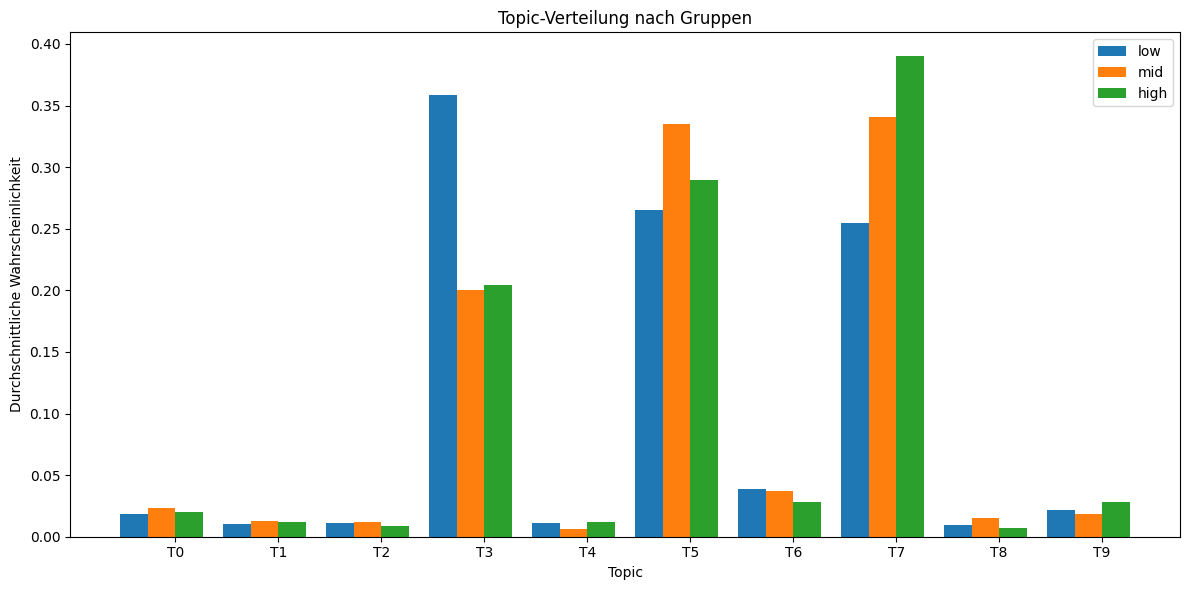

In [22]:
# 4. Topic-Verteilung für Subcorpus berechnen
def get_topic_distribution(documents, lda, vectorizer):
    doc_term_matrix = vectorizer.transform(documents)
    topic_distributions = lda.transform(doc_term_matrix)

    # Durchschnittliche Topic-Verteilung über alle Dokumente
    avg_distribution = topic_distributions.mean(axis=0)

    return avg_distribution, topic_distributions


# 5. Subcorpora vergleichen
def compare_subcorpora(speeches_df, lda, vectorizer, group_column):
    """
    Vergleicht Topic-Verteilungen zwischen verschiedenen Gruppen

    speeches_df: DataFrame mit allen Reden
    lda: trainiertes LDA-Modell
    vectorizer: trainierter Vectorizer
    group_column: Spalte zum Gruppieren (z.B. "Party_orientation")
    """
    results = {}

    for group_name in speeches_df[group_column].unique():
        # Subcorpus erstellen
        subcorpus_df = speeches_df[speeches_df[group_column] == group_name]
        documents = get_documents_for_speeches(subcorpus_df)

        # Topic-Verteilung berechnen
        avg_dist, _ = get_topic_distribution(documents, lda, vectorizer)
        results[group_name] = avg_dist

    return results


# 6. Visualisierung
def plot_topic_comparison(results):
    """
    Visualisiert Topic-Verteilungen für verschiedene Gruppen
    """
    groups = list(results.keys())
    n_topics = len(results[groups[0]])

    fig, ax = plt.subplots(figsize=(12, 6))

    x = np.arange(n_topics)
    width = 0.8 / len(groups)

    for i, group in enumerate(groups):
        offset = width * i - (width * len(groups) / 2)
        ax.bar(x + offset, results[group], width, label=group)

    ax.set_xlabel("Topic")
    ax.set_ylabel("Durchschnittliche Wahrscheinlichkeit")
    ax.set_title("Topic-Verteilung nach Gruppen")
    ax.set_xticks(x)
    ax.set_xticklabels([f"T{i}" for i in range(n_topics)])
    ax.legend()
    plt.tight_layout()
    plt.show()

# Subcorpora vergleichen
eps_comparison = compare_subcorpora(
    environment_speeches, lda_model, vectorizer, group_column="EPS_category"
)
# Ergebnisse visualisieren
plot_topic_comparison(
    eps_comparison
)

100%|██████████| 73/73 [00:00<00:00, 59871.76it/s]


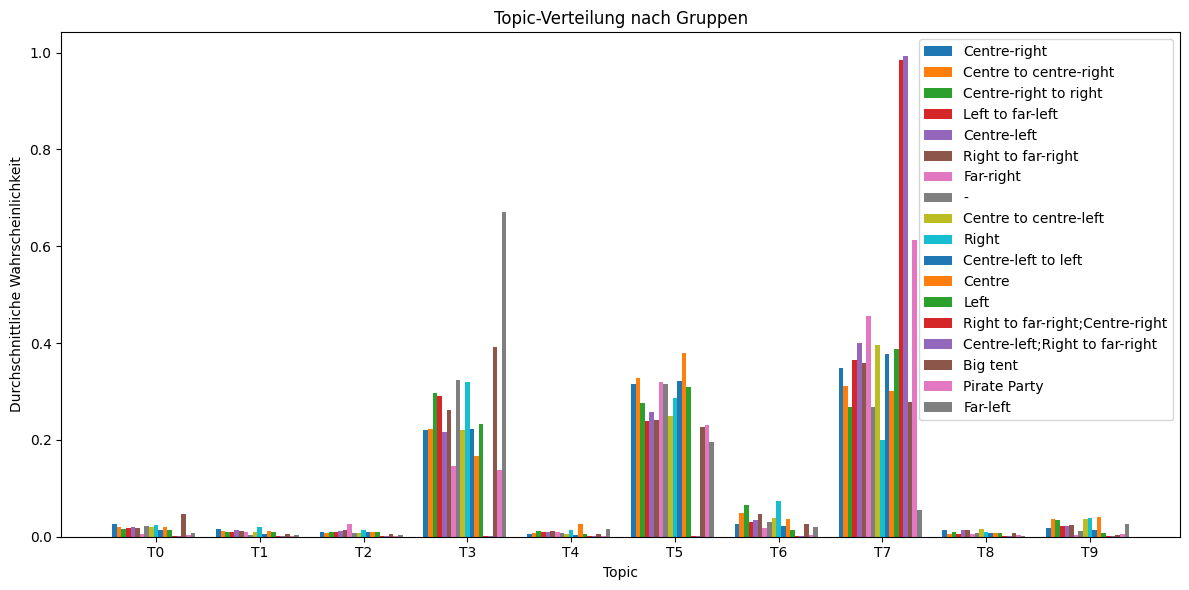

In [23]:
# 4. Subcorpora vergleichen (z.B. nach Parteiausrichtung)
party_comparison = compare_subcorpora(
    environment_speeches, lda_model, vectorizer, group_column="Party_orientation"
)
# 5. Ergebnisse visualisieren
plot_topic_comparison(
    party_comparison
)

100%|██████████| 20204/20204 [00:00<00:00, 72428.45it/s]


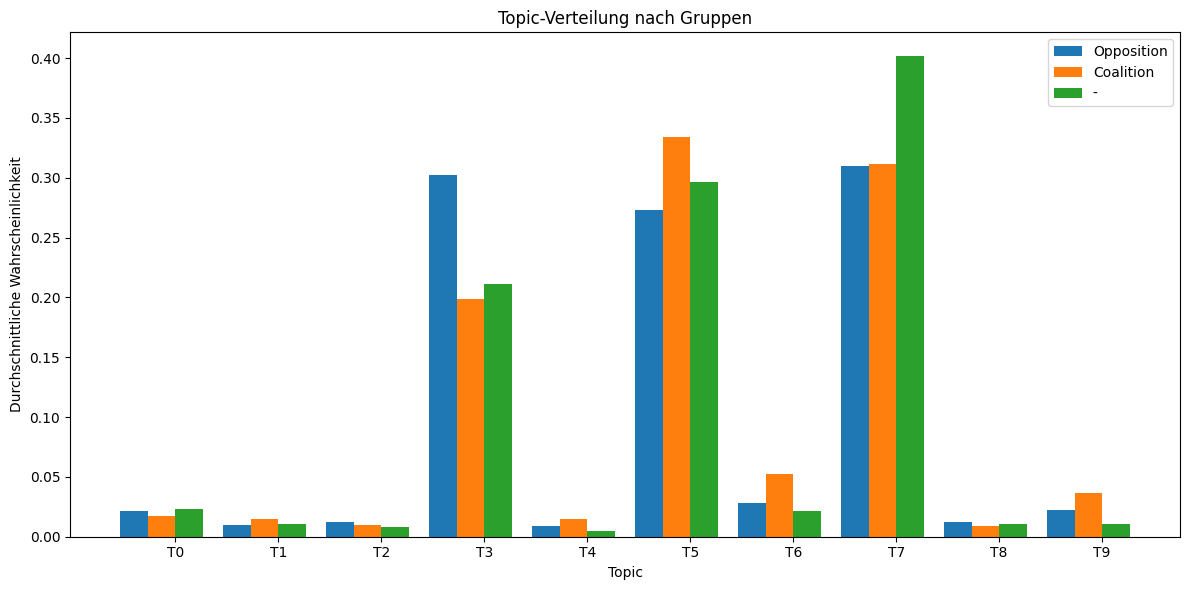

In [24]:
# 6. Auch andere Gruppierungen möglich:
# Nach Regierungsparty
party_comparison = compare_subcorpora(
    environment_speeches,
    lda_model,
    vectorizer,
    group_column="Party_status",
)
plot_topic_comparison(
    party_comparison
)

100%|██████████| 5108/5108 [00:00<00:00, 66240.53it/s]


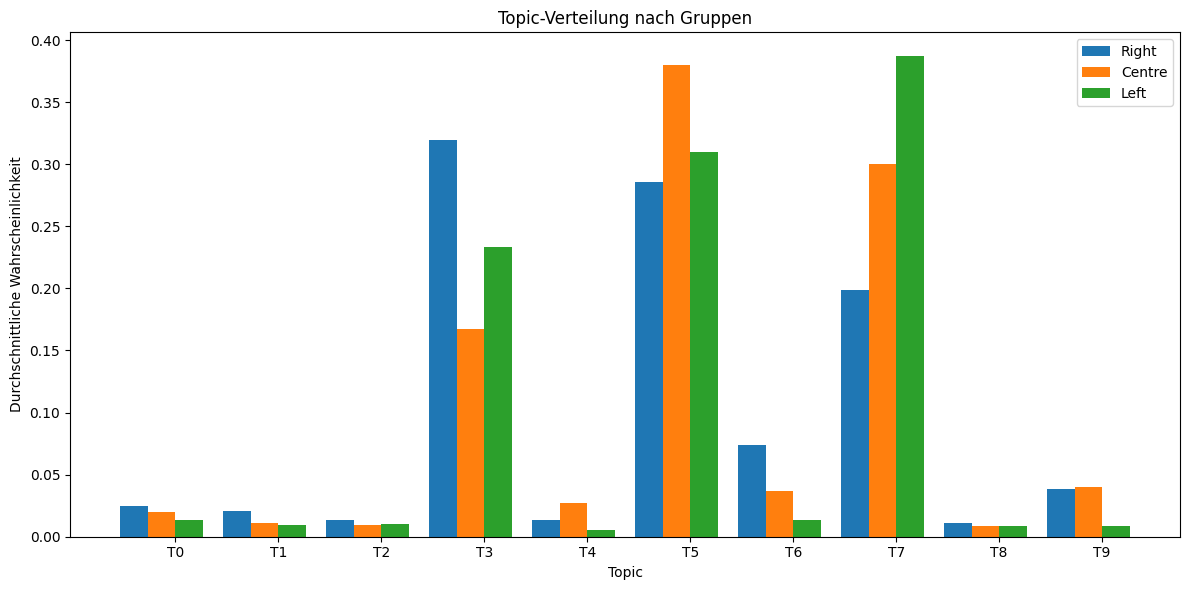

In [25]:
# Nach Party filtered
party_comparison = compare_subcorpora(
    environment_speeches[
        environment_speeches["Party_orientation"].isin(["Left", "Centre", "Right"])
    ],
    lda_model,
    vectorizer,
    group_column="Party_orientation",
)
plot_topic_comparison(
    party_comparison
)

100%|██████████| 9456/9456 [00:00<00:00, 73802.82it/s]


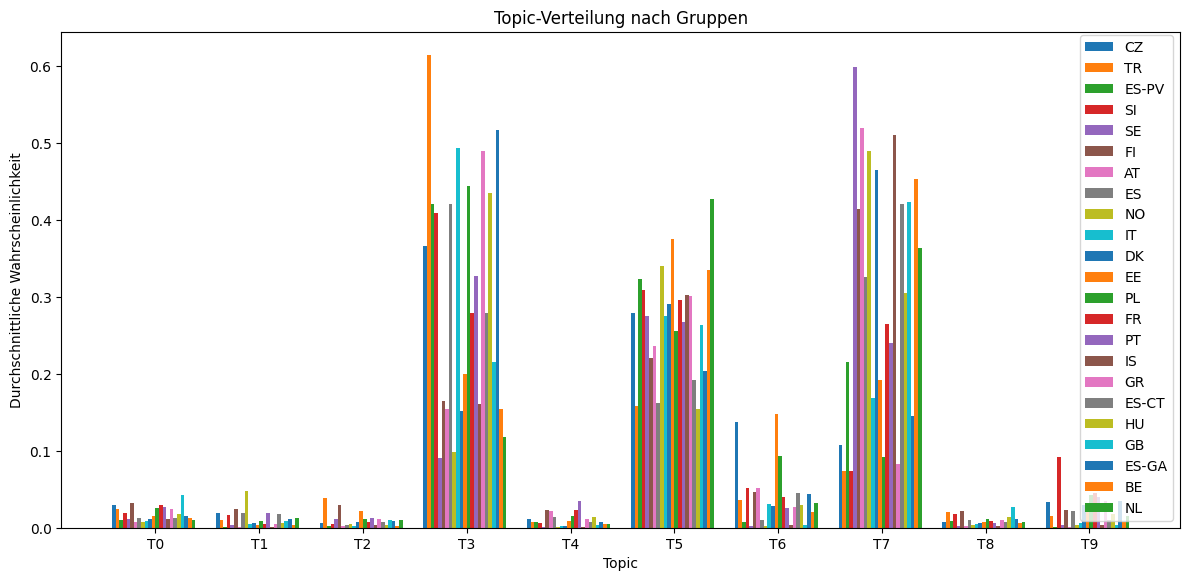

In [26]:
# Nach Land
country_comparison = compare_subcorpora(
    environment_speeches, lda_model, vectorizer, group_column="country"
)
plot_topic_comparison(
    country_comparison
)

100%|██████████| 15374/15374 [00:00<00:00, 73906.62it/s]


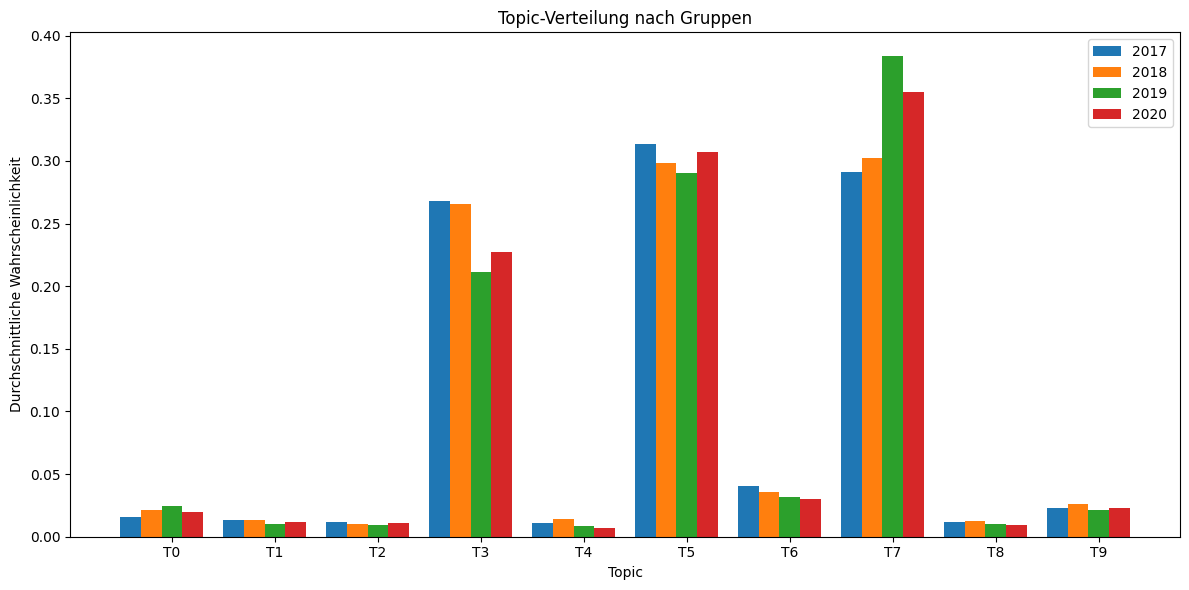

In [27]:
# Nach Jahr
year_comparison = compare_subcorpora(
    environment_speeches, lda_model, vectorizer, group_column="year"
)
plot_topic_comparison(
    year_comparison,
)

100%|██████████| 179/179 [00:00<00:00, 50068.72it/s]


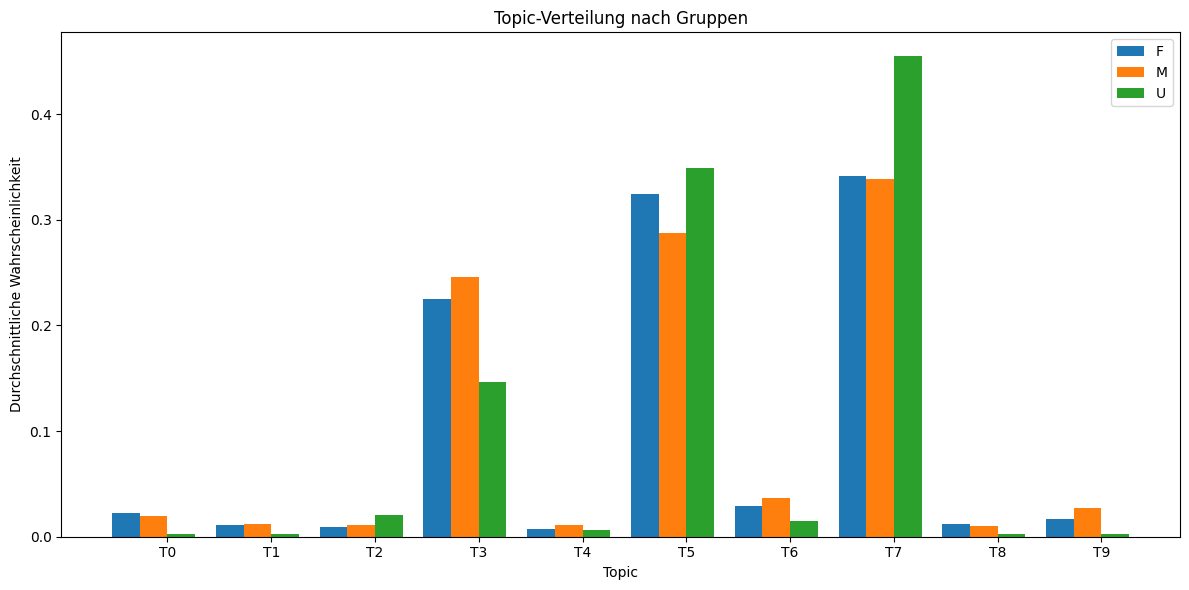

In [ ]:
# Nach Geschlecht
gender_comparison = compare_subcorpora(
    environment_speeches, lda_model, vectorizer, group_column="Speaker_gender"
)
plot_topic_comparison(
    gender_comparison,
)

In [36]:
env_cleaned = environment_speeches.copy()
env_cleaned = env_cleaned[env_cleaned['Speaker_birth'] != "-"]
env_cleaned['Speaker_birth'] = env_cleaned['Speaker_birth'].astype(int)
min_y = env_cleaned['Speaker_birth'].min()
max_y = env_cleaned['Speaker_birth'].max()
bins = np.arange(min_y, max_y + 16, 15)

env_cleaned['Birth_Bin'] = pd.cut(env_cleaned['Speaker_birth'], bins=bins, right=False)

# Ergebnis prüfen
env_cleaned[['Speaker_birth', 'Birth_Bin']].sample(5)

,Speaker_birth,Birth_Bin
3173153,1971,"[1965, 1980)"
3334756,1973,"[1965, 1980)"
1954397,1961,"[1950, 1965)"
1658388,1956,"[1950, 1965)"
743177,1978,"[1965, 1980)"


100%|██████████| 37/37 [00:00<00:00, 49803.99it/s]


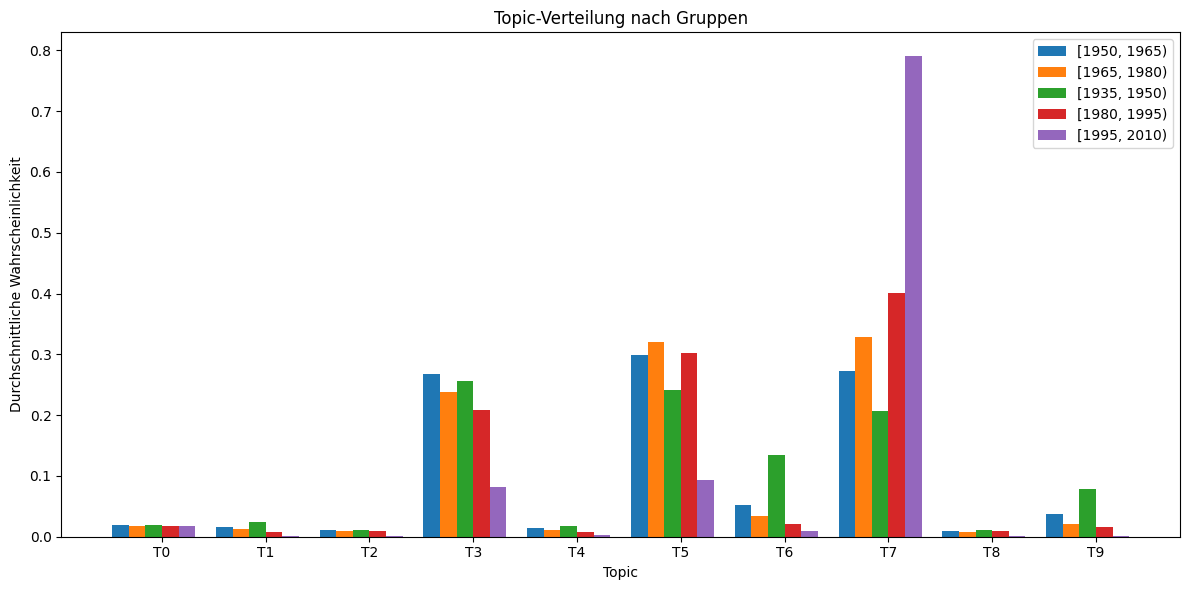

In [37]:


# Nach Geschlecht
gender_comparison = compare_subcorpora(
    env_cleaned, lda_model, vectorizer, group_column="Birth_Bin"
)
plot_topic_comparison(
    gender_comparison,
)

In [29]:
# 7. Statistischer Vergleich: Welches Topic ist am wichtigsten für jede Gruppe?
for group, distribution in party_comparison.items():
    dominant_topic = np.argmax(distribution)
    print(
        f"{group}: Dominantes Topic = {dominant_topic} ({distribution[dominant_topic]:.3f})"
    )

Right: Dominantes Topic = 3 (0.320)
Centre: Dominantes Topic = 5 (0.380)
Left: Dominantes Topic = 7 (0.387)


# Dirichlet Multinomial Regression

In [30]:
from tqdm import tqdm

# 1. Sample ziehen für Schnelligkeit
sample_df = merged_df.sample(n=50000, random_state=42)

# 2. Texte laden (deine get_speech Funktion nutzen)
def load_texts(df):
    texts = []
    for _, row in tqdm(df.iterrows(), total=len(df)):
        try:
            # Hier deine Funktion nutzen
            text = get_speech(row['speech_path'], row['ID'])
            texts.append(text.lower()) # Einfaches Vorprozessieren
        except:
            texts.append("")
    return texts

sample_df['content'] = load_texts(sample_df)
# Leere Texte entfernen
sample_df = sample_df[sample_df['content'].str.len() > 100]
sample_df['eps_category'] = sample_df.apply(lambda row: 'high_eps' if row['EPS_Score'] > sample_df['EPS_Score'].median() else 'low_eps', axis=1)


100%|██████████| 50000/50000 [00:00<00:00, 77536.92it/s]


In [31]:
sample_df.iloc[0]

IndexError: single positional indexer is out-of-bounds

In [ ]:
import tomotopy as tp

# k: Anzahl der Topics, k_range: Anzahl der Metadaten-Dimensionen (hier 1 für EPS)
mdl = tp.DMRModel(k=20, min_cf=5, rm_top=10)

# Dokumente hinzufügen
for index, row in sample_df.iterrows():
    # Wir nehmen den 'content' (Text) und den 'eps_norm' als Metadaten
    if isinstance(row['content'], str):
        # DMR braucht Metadaten als Liste von Floats
        mdl.add_doc(row['content'].strip().split(), metadata=row["eps_category"])

# Training
mdl.burn_in = 100
mdl.train(0) # Initialisierung
for i in range(0, 1000, 10):
    mdl.train(10)
    print(f'Iteration: {i}\tLog-likelihood: {mdl.ll_per_word}')

In [ ]:
# Extraktion der Koeffizienten für den EPS-Score
# Da wir nur 1 Metadaten-Dimension haben, schauen wir uns Index 0 an.
topic_relevance_to_eps = []

for k in range(mdl.k):
    # Die Lambdas beschreiben den Einfluss der Metadaten auf Topic k
    coeff = mdl.lambdas[k][0] 
    top_words = ", ".join([w for w, p in mdl.get_topic_words(k, top_n=5)])
    topic_relevance_to_eps.append((k, coeff, top_words))

res_df = pd.DataFrame(topic_relevance_to_eps, columns=['Topic', 'EPS_Coefficient', 'Top_Words'])
res_df = res_df.sort_values(by='EPS_Coefficient', ascending=False)

print("Topics, die in Ländern mit HOHEM EPS-Score häufiger sind:")
print(res_df.head(5))

print("\nTopics, die in Ländern mit NIEDRIGEM EPS-Score häufiger sind:")
print(res_df.tail(5))

Topics, die in Ländern mit HOHEM EPS-Score häufiger sind:
    Topic  EPS_Coefficient      Top_Words
0       0        -2.302585   , e, t, i, o
1       1        -2.302585   , e, t, a, o
18     18        -2.302585   , e, n, o, 0
17     17        -2.302585   , e, t, o, n
16     16        -2.302585   , e, t, i, o

Topics, die in Ländern mit NIEDRIGEM EPS-Score häufiger sind:
    Topic  EPS_Coefficient      Top_Words
5       5        -2.302585   , e, t, i, o
4       4        -2.302585   , e, t, o, i
3       3        -2.302585   , e, t, a, n
2       2        -2.302585   , e, t, a, o
19     19        -2.302585   , e, t, i, a


In [ ]:
import itertools
corpus = tp.utils.Corpus()
for idx, row in sample_df.iterrows():
    corpus.add_doc(row['content'], multi_metadata=[f"e_{int(row['EPS_Score'])}", f"c_{row['Country']}"])

# We set a range of the first metadata as [2000, 2017] 
# and one of the second metadata as [0, 1].
mdl = tp.DMRModel(tw=tp.TermWeight.ONE, 
    k=20,
    corpus=corpus
)
mdl.optim_interval = 20
mdl.burn_in = 200

mdl.train(0)

print('Num docs:{}, Num Vocabs:{}, Total Words:{}'.format(
    len(mdl.docs), len(mdl.used_vocabs), mdl.num_words
))

# Let's train the model
mdl.train(100, show_progress=True)

mdl.summary()

eps_labels = sorted(l for l in mdl.multi_metadata_dict if l.startswith('e_'))
country_labels = sorted(l for l in mdl.multi_metadata_dict if l.startswith('c_'))

# calculate topic distribution with each metadata using get_topic_prior()
print('Topic distributions by EPS')
for l in eps_labels:
    print(l, '\n', mdl.get_topic_prior(multi_metadata=[l]), '\n')

print('Topic distributions by country')
for l in country_labels:
    print(l, '\n', mdl.get_topic_prior(multi_metadata=[l]), '\n')

# Also we can estimate topic distributions with multiple metadata
print('Topic distributions by year-journal')
for y, j in itertools.product(eps_labels, country_labels):
    print(y, ',', j, '\n', mdl.get_topic_prior(multi_metadata=[y, j]), '\n')

Num docs:31221, Num Vocabs:158, Total Words:41801884


Iteration: 100%|██████████| 100/100 [00:52<00:00,  1.90it/s, LLPW: -4.962454]


<Basic Info>
| DMRModel (current version: 0.13.0)
| 31221 docs, 41801884 words
| Total Vocabs: 158, Used Vocabs: 158
| Entropy of words: 2.96015
| Entropy of term-weighted words: 2.96015
| Removed Vocabs: <NA>
| Multi-Metadata of docs and its distribution
|  e_37: 369
|  c_Spain: 1486
|  e_55: 1229
|  c_Netherlands: 3507
|  e_46: 2426
|  c_Türkiye: 1698
|  e_59: 3775
|  c_United Kingdom: 5667
|  e_49: 1453
|  c_Austria: 340
|  e_67: 713
|  c_Italy: 442
|  c_France: 4124
|  e_50: 733
|  c_Slovenia: 618
|  e_64: 987
|  c_Norway: 1095
|  c_Hungary: 743
|  e_47: 1267
|  c_Greece: 1231
|  e_58: 1702
|  e_78: 1221
|  c_Belgium: 1264
|  e_57: 1266
|  e_54: 2170
|  c_Czechia: 1183
|  e_14: 134
|  c_Iceland: 799
|  e_68: 499
|  c_Denmark: 1878
|  e_63: 1229
|  c_Sweden: 792
|  e_75: 1300
|  e_62: 1088
|  e_56: 241
|  c_Estonia: 829
|  e_80: 1043
|  e_60: 807
|  c_Poland: 1481
|  e_40: 745
|  e_42: 594
|  c_Portugal: 979
|  e_53: 745
|  e_51: 297
|  e_65: 171
|  c_Finland: 1065
|  e_52: 159
|  e

In [ ]:
# calculate topic distribution with each metadata using get_topic_prior()
print('Topic distributions by EPS')
for l in eps_labels:
    print(l, '\n', mdl.get_topic_words(multi_metadata=[l]), '\n')

print('Topic distributions by country')
for l in country_labels:
    print(l, '\n', mdl.get_topic_words(multi_metadata=[l]), '\n')

# Also we can estimate topic distributions with multiple metadata
print('Topic distributions by year-journal')
for y, j in itertools.product(eps_labels, country_labels):
    print(y, ',', j, '\n', mdl.get_topic_words(multi_metadata=[y, j]), '\n')

Topic distributions by EPS


TypeError: function missing required argument 'topic_id' (pos 1)

In [ ]:
import tomotopy as tp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# 1. Datenvorbereitung
# Wir brauchen eine Liste der Länder für das Mapping
countries = sample_df['country'].unique().tolist()
country_to_idx = {name: i for i, name in enumerate(countries)}

# EPS-Score normalisieren (hilft bei der Konvergenz der Regression)
eps_min = sample_df['EPS_Score'].min()
eps_max = sample_df['EPS_Score'].max()

# 2. Modell initialisieren
# degrees: 1 für EPS (linearer Trend), 0 für Länder (diskrete Kategorien)
# Wir haben 2 Metadaten-Dimensionen: [EPS_Score, Country_Index]
mdl = tp.GDMRModel(k=20, degrees=[1, 0]) 

# 3. Dokumente hinzufügen
print("Füge Dokumente zum Modell hinzu...")
for index, row in tqdm(sample_df.iterrows(), total=len(sample_df)):
    if isinstance(row['content'], str) and len(row['content']) > 100:
        words = row['content'].lower().split()
        
        # Metadaten als Liste von Floats
        # [Kontinuierlicher Wert, Kategorialer Index]
        meta = [float(row['EPS_Score']), float(country_to_idx[row['country']])]
        mdl.add_doc(words, numeric_metadata=meta)

# 4. Training
print("Starte Training...")
mdl.burn_in = 100
for i in range(0, 100, 20):
    mdl.train(20)
    if i % 100 == 0:
        print(f'Iteration: {i}\tLog-Likelihood: {mdl.ll_per_word:.4f}')

# --- AUSWERTUNG ---

# 5. Topic Distribution nach EPS-Score (Trend)
def plot_eps_trend(topic_id):
    x_axis = np.linspace(eps_min, eps_max, 100)
    y_axis = [get_gdmr_relevance(mdl, topic_id, [x, 0.0]) for x in x_axis]
    
    words = ", ".join([w for w, p in mdl.get_topic_words(topic_id, top_n=5)])
    plt.plot(x_axis, y_axis)
    plt.title(f"Trend für Topic {topic_id}\n{words}")
    plt.xlabel("OECD EPS Score")
    plt.ylabel("Wahrscheinlichkeit")
    plt.show()

def get_gdmr_relevance(mdl, topic_id, metadata):
    # metadata ist z.B. [40.5, 2.0]
    # Lambdas für Topic k abrufen
    # Bei degrees=[1, 0] hat jedes Topic 3 Lambdas: [Intercept, EPS-Steigung, Country-Konstante]
    lambdas = mdl.lambdas[topic_id]
    
    # Lineare Kombination: Intercept + Steigung * EPS + Konstante * Country
    # Achtung: Bei degree 0 (Country) zählt nur der Intercept der Kategorie
    score = lambdas[0] + lambdas[1] * metadata[0] # Einfache Version für degree [1,0]
    return np.exp(score)

# 6. Topic Distribution nach Country
def get_country_dist():
    data = []
    
    # Wir loopen durch jedes Land
    for c_name, c_idx in country_to_idx.items():
        # Durchschnittlichen EPS-Score für dieses Land holen
        avg_eps = sample_df[sample_df['country'] == c_name]['EPS_Score'].mean()
        
        # Unnormierte Scores für alle Topics berechnen
        topic_scores = []
        for k in range(mdl.k):
            l = mdl.lambdas[k]
            # Formel: exp(Intercept + EPS_Effekt * EPS_Wert + Country_Effekt * Country_Index)
            # Hinweis: GDMR nutzt intern Basis-Funktionen. 
            # Bei degree=0 ist das einfach der Koeffizient für diesen Index.
            val = np.exp(l[0] + l[1] * avg_eps + l[c_idx + 2]) # +2 weil l[0]=Intercept, l[1]=EPS
            topic_scores.append(val)
        
        # Normalisieren, damit die Summe der Topic-Wahrscheinlichkeiten 1 ergibt
        total = sum(topic_scores)
        topic_probs = [s / total for s in topic_scores]
        
        data.append([c_name] + topic_probs)
    
    columns = ['Country'] + [f'Topic_{i}' for i in range(mdl.k)]
    return pd.DataFrame(data, columns=columns)

country_df = get_country_dist()

# Visualisierung der Top 5 Länder für ein bestimmtes Topic
top_topic = 0 # Beispiel Topic ID
sns.barplot(data=country_df.sort_values(by=f'Topic_{top_topic}', ascending=False).head(10), 
            x='Country', y=f'Topic_{top_topic}')
plt.title(f"Top Länder für Topic {top_topic}")
plt.xticks(rotation=45)
plt.show()

Füge Dokumente zum Modell hinzu...


100%|██████████| 31221/31221 [00:01<00:00, 20540.28it/s]


Starte Training...
Iteration: 0	Log-Likelihood: -8.7116


IndexError: index 2 is out of bounds for axis 0 with size 2

# Co-occurrence Analysis

In [29]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from pyconll.conllu import conllu
from tqdm import tqdm

# 1. Corpus vorbereiten
_text_cache = {}

def get_speech(country: str, year: int, textId: str, docId: str) -> str:
    global _text_cache
    
    cache_key = f"{country}_{year}_{textId}_{docId}"
    if cache_key in _text_cache:
        return _text_cache[cache_key]
    
    filepath = f"{PARLAMINT_DIR}/ParlaMint-{country}-en.ana/ParlaMint-{country}-en.conllu/{year}/{textId}.conllu"
    
    with open(filepath, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    
    content = []
    found = False
    
    for line in lines:
        # Prüfe ob neue Document-ID beginnt
        if line.strip().startswith('# newdoc id ='):
            # Extrahiere die ID aus der Zeile
            current_id = line.split('=', 1)[1].strip()
            
            if current_id == docId:
                # Ziel-ID gefunden, beginne Sammlung
                found = True
                content.append(line)
            elif found:
                # Eine neue ID gefunden, aber wir haben schon gesammelt -> Ende
                break
        elif found:
            # Sammle alle Zeilen nach der Ziel-ID
            content.append(line)
    
    doc_text = ''.join(content)
    
    session_doc = conllu.load_from_string(doc_text)

    doc = ""

    for sentence in session_doc:
      doc += " ".join([str(token.lemma) for token in sentence.tokens]) # if token.upos in ['NOUN']]) #, 'PROPN'
      doc += "\n"
    
    _text_cache[cache_key] = doc
    
    return doc

def get_documents_for_speeches(speeches: pd.DataFrame):
    documents = []
    for _, row in tqdm(speeches.iterrows(), total=len(speeches)):
        text = get_speech(row["country"], row["year"], row["Text_ID"], row["ID"])
        if text:  # Nur nicht-leere Texte
            documents.append(text)
    return documents

environment_speeches = merged_df[merged_df["Topic"] == "Environment"]
all_documents = get_documents_for_speeches(environment_speeches)

100%|██████████| 62021/62021 [08:20<00:00, 124.00it/s]


CO-OCCURRENCE ANALYSE

1. Satz-Segmentierung...

2. Erstelle binäre Document-Term-Matrix...
Anzahl Sätze: 846732
Anzahl Features: 21113

3. Berechne Co-Occurrence Matrix...

4. Erstelle Netzwerk für Term 'climate'...
   Anzahl Kanten: 225

5. Top 15 Co-Occurrences für 'climate':
   climate                         381616.03
   change                           52597.69
   policy                           12579.57
   agreement                         6043.74
   crisis                            5019.49
   action                            4818.50
   emergency                         3621.10
   target                            3482.24
   paris                             3267.08
   energy                            3045.49
   adaptation                        3035.93
   global                            2860.43
   government                        2797.32
   fight                             2506.53
   challenge                         2298.77

6. Visualisiere Netzwerk...


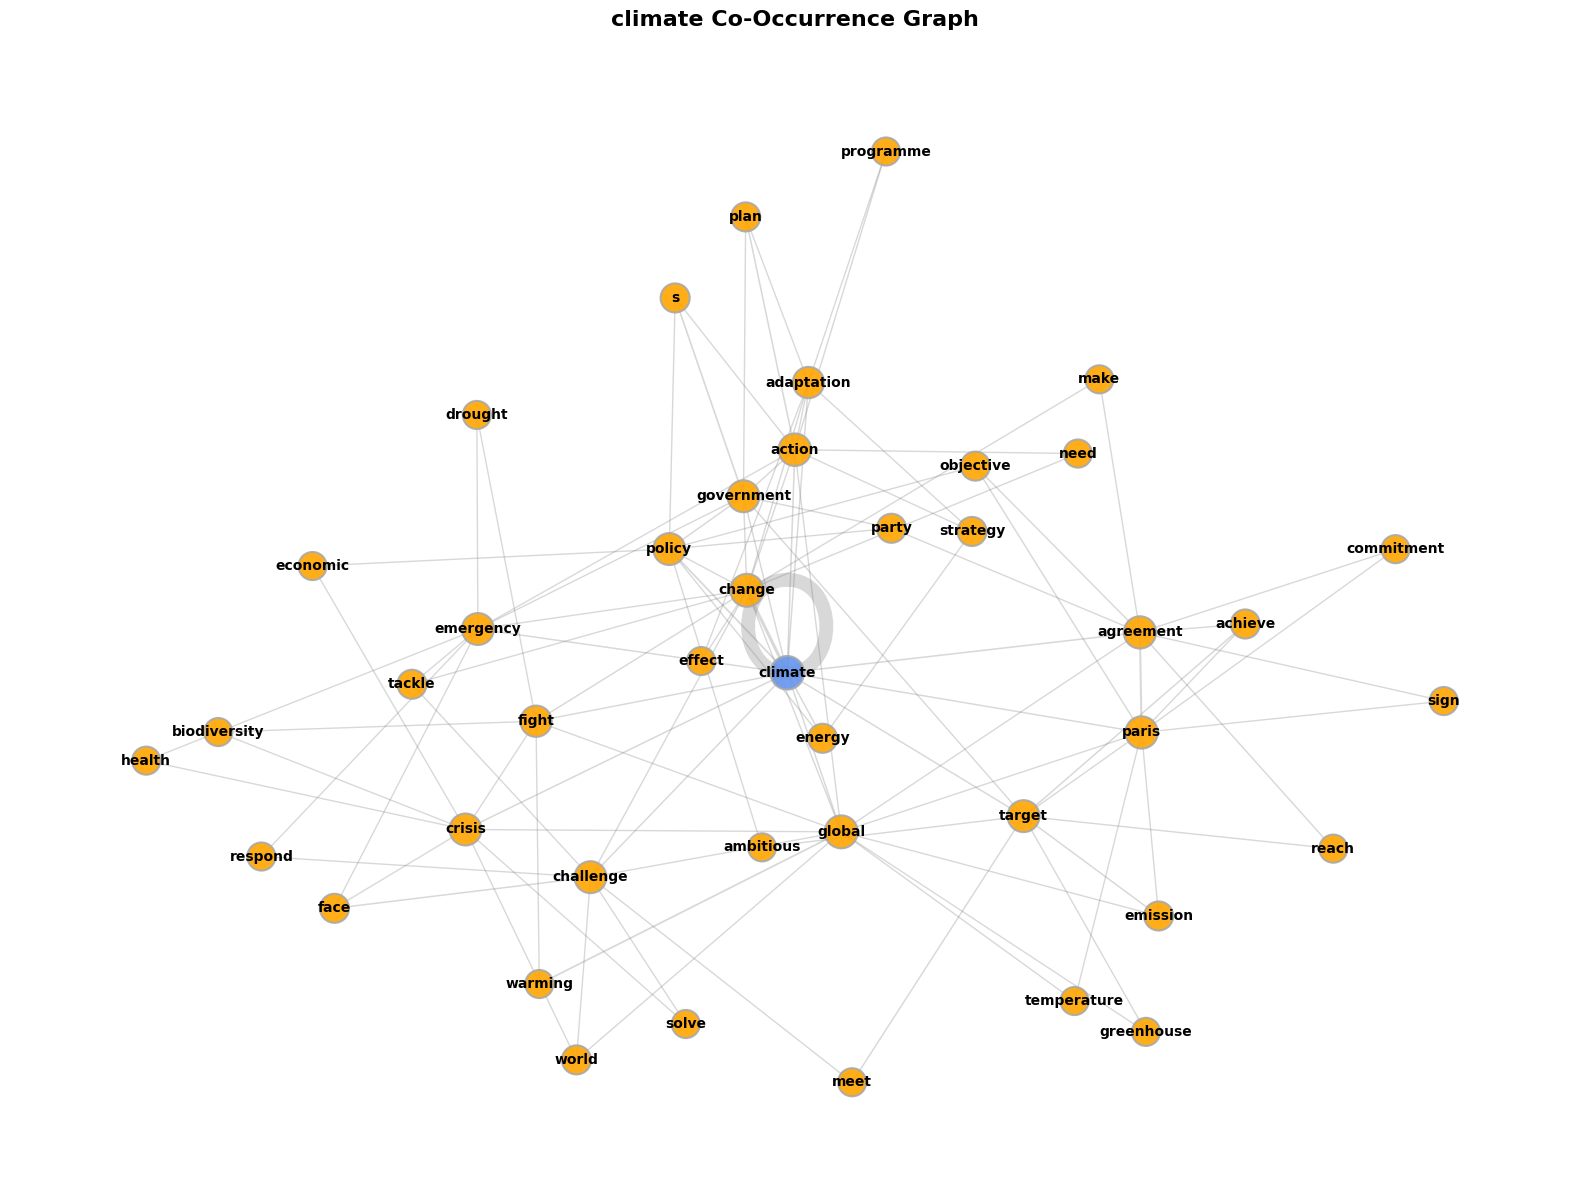

,from,to,sig
0,climate,climate,381616.032127
1,climate,change,52597.690192
2,climate,policy,12579.569539
3,climate,agreement,6043.741548
4,climate,crisis,5019.485253
5,climate,action,4818.495452
6,climate,emergency,3621.098738
7,climate,target,3482.241625
8,climate,paris,3267.080176
9,climate,energy,3045.493065


In [34]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import networkx as nx
import matplotlib.pyplot as plt
import re
from scipy.sparse import csr_matrix

# ============================================================================
# 1. SATZ-SEGMENTIERUNG
# ============================================================================

def split_into_sentences(documents):
    """
    Teilt Dokumente in Sätze auf (analog zu corpus_reshape in R)
    """
    sentences = []
    for doc in documents:
        # Einfache Satz-Segmentierung basierend auf Satzzeichen
        sents = re.split(r'[.!?]+', doc)
        sents = [s.strip() for s in sents if s.strip()]
        sentences.extend(sents)
    return sentences

# ============================================================================
# 2. BINÄRE DOCUMENT-TERM-MATRIX ERSTELLEN
# ============================================================================

def create_binary_dtm(sentences, min_df=10, stop_words='english'):
    """
    Erstellt eine binäre Document-Term-Matrix
    
    Parameters:
    -----------
    sentences : list
        Liste von Sätzen
    min_df : int
        Minimale Dokumentfrequenz (wie minimumFrequency in R)
    stop_words : str oder list
        Stop Words ('english' für sklearn's Liste)
    
    Returns:
    --------
    bin_dtm : scipy.sparse matrix
        Binäre Document-Term-Matrix
    feature_names : list
        Liste der Terme
    """
    # CountVectorizer mit binärer Ausgabe
    vectorizer = CountVectorizer(
        min_df=min_df,
        stop_words=stop_words,
        binary=True,  # Binäre Werte: 1 wenn Term vorkommt, 0 sonst
        lowercase=True,
        token_pattern=r'\b[a-z]+\b'  # Nur Buchstaben
    )
    
    bin_dtm = vectorizer.fit_transform(sentences)
    feature_names = vectorizer.get_feature_names_out()
    
    print(f"Anzahl Sätze: {len(sentences)}")
    print(f"Anzahl Features: {len(feature_names)}")
    
    return bin_dtm, feature_names

# ============================================================================
# 3. CO-OCCURRENCE MATRIX BERECHNEN
# ============================================================================

def compute_cooccurrence_matrix(bin_dtm):
    """
    Berechnet Co-Occurrence Matrix durch Matrixmultiplikation
    (analog zu: coocCounts <- t(binDTM) %*% binDTM)
    
    Returns:
    --------
    cooc_matrix : numpy array
        Term-Term Co-Occurrence Matrix
    """
    # Transponierte Matrix multipliziert mit Original
    cooc_matrix = (bin_dtm.T @ bin_dtm).toarray()
    return cooc_matrix

# ============================================================================
# 4. SIGNIFIKANZ-MASSE BERECHNEN
# ============================================================================

def calculate_cooc_statistics(cooc_term, bin_dtm, feature_names, 
                               cooc_matrix, measure='loglik'):
    """
    Berechnet Co-Occurrence Signifikanz für einen Zielterm
    
    Parameters:
    -----------
    cooc_term : str
        Zielterm
    bin_dtm : scipy.sparse matrix
        Binäre DTM
    feature_names : list
        Feature-Namen
    cooc_matrix : numpy array
        Co-Occurrence Matrix
    measure : str
        'loglik', 'dice', oder 'mi'
    
    Returns:
    --------
    dict : {term: significance_score}
    """
    if cooc_term not in feature_names:
        raise ValueError(f"Term '{cooc_term}' nicht im Vokabular")
    
    # Index des Zielterms
    term_idx = list(feature_names).index(cooc_term)
    
    # Notwendige Zählungen
    k = bin_dtm.shape[0]  # Anzahl Dokumente (Sätze)
    ki = bin_dtm[:, term_idx].sum()  # Häufigkeit des Zielterms
    kj = bin_dtm.sum(axis=0).A1  # Häufigkeiten aller Terme
    kij = cooc_matrix[term_idx, :]  # Co-Occurrences mit Zielterm
    
    # Verhindere Division durch Null
    kj = np.where(kj == 0, 1, kj)
    kij = np.where(kij == 0, 1, kij)
    
    if measure.lower() == 'loglik':
        # Log-Likelihood
        sig = 2 * (
            (k * np.log(k)) - 
            (ki * np.log(ki)) - 
            (kj * np.log(kj)) + 
            (kij * np.log(kij)) +
            (k - ki - kj + kij) * np.log(np.maximum(k - ki - kj + kij, 1)) +
            (ki - kij) * np.log(np.maximum(ki - kij, 1)) + 
            (kj - kij) * np.log(np.maximum(kj - kij, 1)) -
            (k - ki) * np.log(k - ki) - 
            (k - kj) * np.log(k - kj)
        )
    elif measure.lower() == 'dice':
        # Dice Coefficient
        sig = 2 * kij / (ki + kj)
    elif measure.lower() == 'mi':
        # Mutual Information
        sig = np.log(k * kij / (ki * kj))
    else:
        raise ValueError("measure muss 'loglik', 'dice' oder 'mi' sein")
    
    # Als Dictionary zurückgeben, sortiert nach Signifikanz
    result = dict(zip(feature_names, sig))
    result = {k: v for k, v in sorted(result.items(), 
                                      key=lambda x: x[1], 
                                      reverse=True)}
    
    return result

# ============================================================================
# 5. NETZWERK-GRAPH ERSTELLEN
# ============================================================================

def build_cooccurrence_network(cooc_term, bin_dtm, feature_names, 
                                cooc_matrix, num_coocs=15, measure='loglik'):
    """
    Erstellt Netzwerk-Graph für Co-Occurrences
    (analog zum R-Code mit resultGraph)
    
    Returns:
    --------
    pd.DataFrame mit Spalten: from, to, sig
    """
    result_graph = []
    
    # 1. Co-Occurrences für Zielterm berechnen
    coocs = calculate_cooc_statistics(
        cooc_term, bin_dtm, feature_names, cooc_matrix, measure
    )
    
    # Top N Co-Occurrences
    top_coocs = dict(list(coocs.items())[:num_coocs])
    
    # Kanten vom Zielterm zu seinen Co-Occurrences
    for term, sig in top_coocs.items():
        result_graph.append({
            'from': cooc_term,
            'to': term,
            'sig': sig
        })
    
    # 2. Sekundäre Co-Occurrences (für jeden Co-Occurrence Term)
    for i, (new_cooc_term, _) in enumerate(top_coocs.items()):
        if i >= num_coocs:
            break
            
        coocs2 = calculate_cooc_statistics(
            new_cooc_term, bin_dtm, feature_names, cooc_matrix, measure
        )
        
        top_coocs2 = dict(list(coocs2.items())[:num_coocs])
        
        # Überspringe erste (ist der Term selbst)
        for j, (term, sig) in enumerate(top_coocs2.items()):
            if j == 0:  # Überspringe Selbst-Referenz
                continue
            result_graph.append({
                'from': new_cooc_term,
                'to': term,
                'sig': sig
            })
    
    return pd.DataFrame(result_graph)

# ============================================================================
# 6. NETZWERK VISUALISIEREN
# ============================================================================

def visualize_cooccurrence_network(result_graph, cooc_term, 
                                    min_degree=2, figsize=(16, 12)):
    """
    Visualisiert das Co-Occurrence Netzwerk
    """
    # NetworkX Graph erstellen
    G = nx.from_pandas_edgelist(
        result_graph, 
        source='from', 
        target='to', 
        edge_attr='sig',
        create_using=nx.Graph()
    )
    
    # Knoten mit zu wenig Verbindungen entfernen
    degrees = dict(G.degree())
    nodes_to_remove = [node for node, degree in degrees.items() 
                       if degree < min_degree]
    G.remove_nodes_from(nodes_to_remove)
    
    # Layout berechnen (Fruchterman-Reingold wie in R)
    pos = nx.spring_layout(G, k=0.5, iterations=50, seed=42)
    
    # Plot erstellen
    plt.figure(figsize=figsize)
    
    # Knoten-Farben: Zielterm blau, andere orange
    node_colors = ['cornflowerblue' if node == cooc_term else 'orange' 
                   for node in G.nodes()]
    
    # Knoten-Größen basierend auf Degree
    degrees = dict(G.degree())
    node_sizes = [300 + 100 * np.log1p(degrees[node]) for node in G.nodes()]
    
    # Kanten-Breiten basierend auf Signifikanz
    edge_weights = [G[u][v]['sig'] for u, v in G.edges()]
    if edge_weights:
        min_weight = min(edge_weights)
        max_weight = max(edge_weights)
        edge_widths = [1 + 9 * (w - min_weight) / (max_weight - min_weight + 0.001) 
                       for w in edge_weights]
    else:
        edge_widths = [1] * len(G.edges())
    
    # Zeichne Netzwerk
    nx.draw_networkx_edges(
        G, pos,
        width=edge_widths,
        alpha=0.3,
        edge_color='gray'
    )
    
    nx.draw_networkx_nodes(
        G, pos,
        node_color=node_colors,
        node_size=node_sizes,
        alpha=0.9,
        edgecolors='darkgray',
        linewidths=1.5
    )
    
    nx.draw_networkx_labels(
        G, pos,
        font_size=10,
        font_weight='bold',
        font_family='sans-serif'
    )
    
    plt.title(f'{cooc_term} Co-Occurrence Graph', 
              fontsize=16, fontweight='bold', pad=20)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# ============================================================================
# 7. HAUPTFUNKTION - KOMPLETT-WORKFLOW
# ============================================================================

def analyze_cooccurrences(all_documents, target_term, 
                          min_df=10, num_coocs=15, 
                          measure='loglik', min_degree=2):
    """
    Kompletter Workflow für Co-Occurrence Analyse
    
    Parameters:
    -----------
    all_documents : list
        Liste von Dokumenten (Texten)
    target_term : str
        Zielterm für die Analyse
    min_df : int
        Minimale Dokumentfrequenz
    num_coocs : int
        Anzahl der Top Co-Occurrences
    measure : str
        'loglik', 'dice', oder 'mi'
    min_degree : int
        Minimale Anzahl Verbindungen für Visualisierung
    
    Returns:
    --------
    result_graph : pd.DataFrame
        Netzwerk-Daten
    """
    print("=" * 60)
    print("CO-OCCURRENCE ANALYSE")
    print("=" * 60)
    
    # 1. Satz-Segmentierung
    print("\n1. Satz-Segmentierung...")
    sentences = split_into_sentences(all_documents)
    
    # 2. Binäre DTM erstellen
    print("\n2. Erstelle binäre Document-Term-Matrix...")
    bin_dtm, feature_names = create_binary_dtm(
        sentences, 
        min_df=min_df,
        stop_words='english'
    )
    
    # 3. Co-Occurrence Matrix berechnen
    print("\n3. Berechne Co-Occurrence Matrix...")
    cooc_matrix = compute_cooccurrence_matrix(bin_dtm)
    
    # 4. Netzwerk erstellen
    print(f"\n4. Erstelle Netzwerk für Term '{target_term}'...")
    result_graph = build_cooccurrence_network(
        target_term, bin_dtm, feature_names, cooc_matrix,
        num_coocs=num_coocs, measure=measure
    )
    
    print(f"   Anzahl Kanten: {len(result_graph)}")
    
    # 5. Top Co-Occurrences anzeigen
    print(f"\n5. Top {num_coocs} Co-Occurrences für '{target_term}':")
    top_coocs = result_graph[result_graph['from'] == target_term].head(num_coocs)
    for _, row in top_coocs.iterrows():
        print(f"   {row['to']:30s} {row['sig']:10.2f}")
    
    # 6. Visualisierung
    print("\n6. Visualisiere Netzwerk...")
    visualize_cooccurrence_network(
        result_graph, target_term, 
        min_degree=min_degree
    )
    
    return result_graph, top_coocs

# ============================================================================
# VERWENDUNG
# ============================================================================

result_graph, top_coocs = analyze_cooccurrences(
    all_documents, 
    target_term='climate',  # Oder 'carbon', 'emission', etc.
    min_df=5,              # Mindestfrequenz
    num_coocs=15,          # Anzahl Co-Occurrences
    measure='loglik',      # Signifikanz-Maß
    min_degree=2           # Min. Verbindungen für Visualisierung
)
top_coocs

<Axes: ylabel='Birth_Bin'>

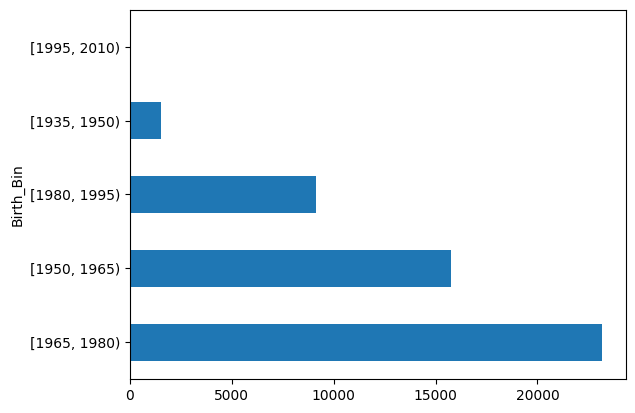

In [31]:
env_cleaned = environment_speeches.copy()
env_cleaned = env_cleaned[env_cleaned['Speaker_birth'] != "-"]
env_cleaned['Speaker_birth'] = env_cleaned['Speaker_birth'].astype(int)
min_y = env_cleaned['Speaker_birth'].min()
max_y = env_cleaned['Speaker_birth'].max()
bins = np.arange(min_y, max_y + 16, 15)
env_cleaned['Birth_Bin'] = pd.cut(env_cleaned['Speaker_birth'], bins=bins, right=False)

env_cleaned['Birth_Bin'].value_counts().plot.barh()


Analysiere Altersgruppe: [1935, 1950)

Anzahl Reden in dieser Gruppe: 1530



100%|██████████| 1530/1530 [00:00<00:00, 49832.54it/s]

CO-OCCURRENCE ANALYSE

1. Satz-Segmentierung...

2. Erstelle binäre Document-Term-Matrix...
Anzahl Sätze: 20260
Anzahl Features: 3140

3. Berechne Co-Occurrence Matrix...

4. Erstelle Netzwerk für Term 'climate'...
   Anzahl Kanten: 225

5. Top 15 Co-Occurrences für 'climate':
   climate                           6533.25
   change                             982.11
   policy                             195.47
   global                             118.87
   objective                          111.97
   plan                               103.31
   agreement                           90.66
   fight                               78.90
   adaptation                          76.35
   warming                             68.61
   action                              68.47
   paris                               67.28
   crisis                              66.97
   target                              66.92
   sound                               66.53

6. Visualisiere Netzwerk...


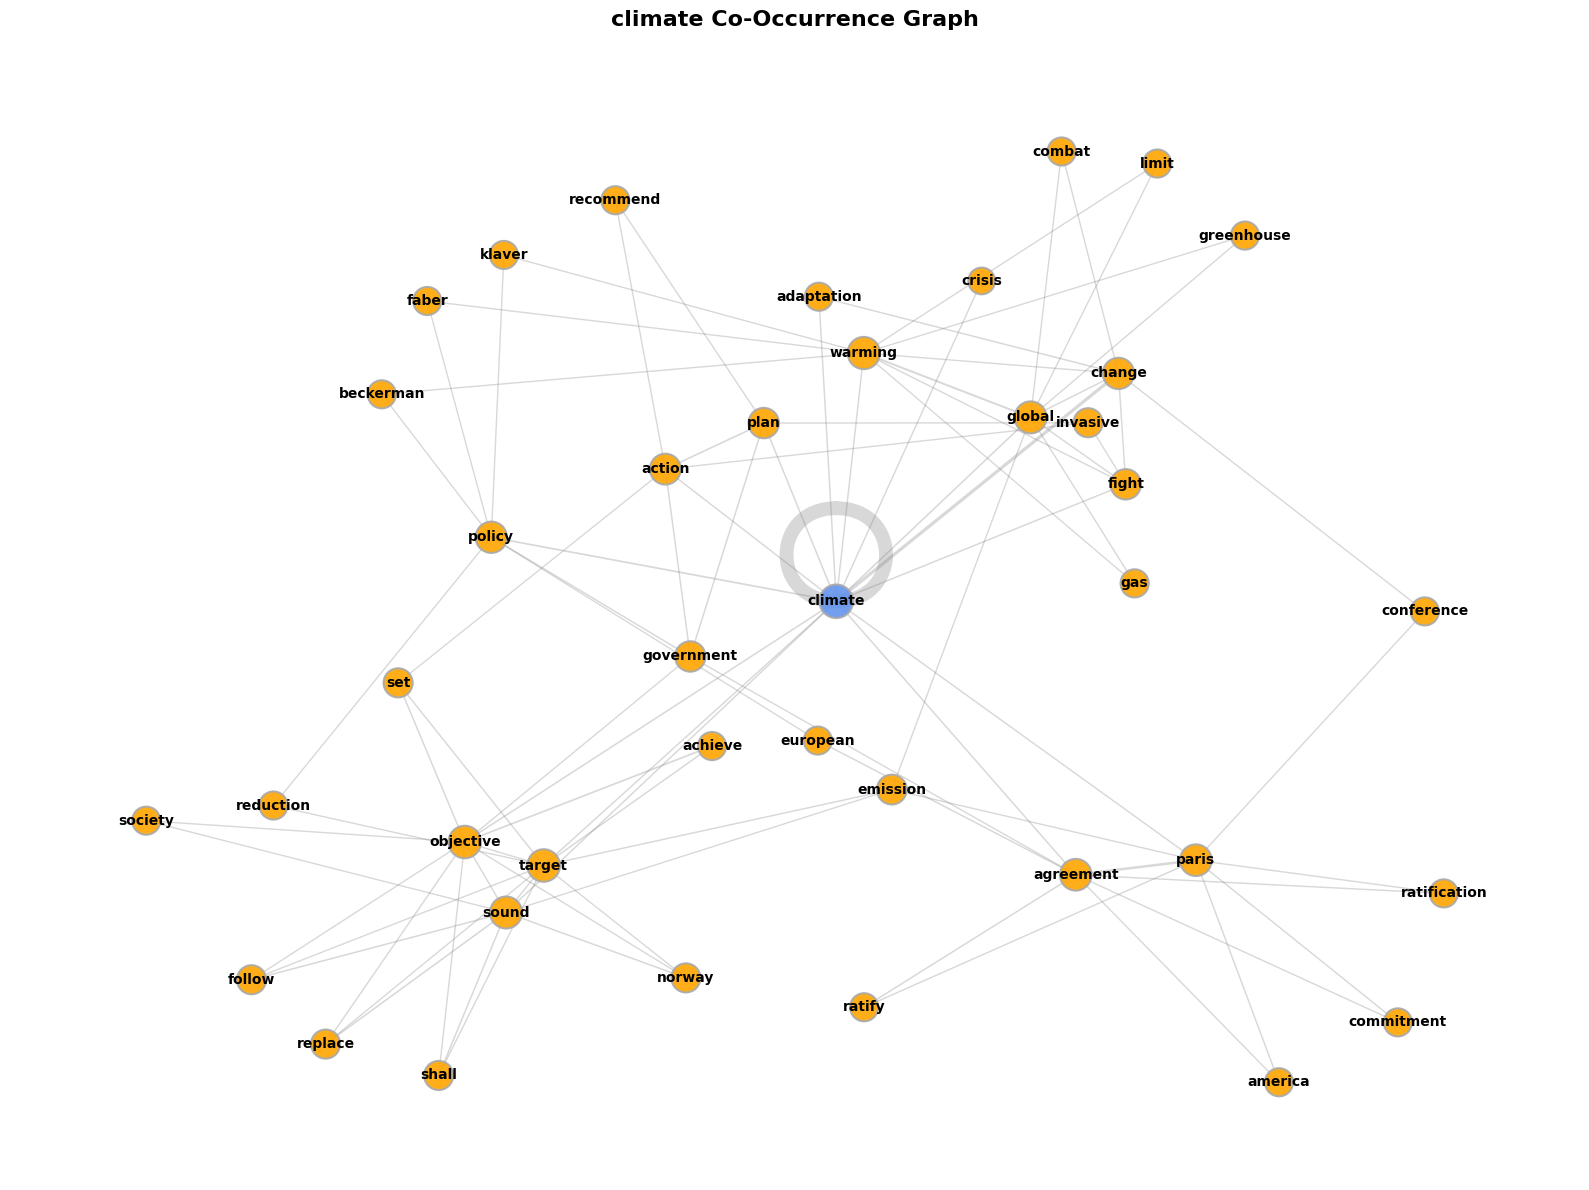


Analysiere Altersgruppe: [1950, 1965)

Anzahl Reden in dieser Gruppe: 15740



100%|██████████| 15740/15740 [00:00<00:00, 68374.67it/s]


CO-OCCURRENCE ANALYSE

1. Satz-Segmentierung...

2. Erstelle binäre Document-Term-Matrix...
Anzahl Sätze: 207820
Anzahl Features: 10619

3. Berechne Co-Occurrence Matrix...

4. Erstelle Netzwerk für Term 'climate'...
   Anzahl Kanten: 225

5. Top 15 Co-Occurrences für 'climate':
   climate                          75513.82
   change                           10482.74
   policy                            2485.87
   agreement                         2186.77
   energy                            1157.54
   paris                              890.47
   adaptation                         824.33
   action                             784.88
   crisis                             689.36
   plan                               667.19
   strategy                           662.30
   objective                          630.49
   emission                           600.42
   summit                             591.74
   government                         571.15

6. Visualisiere Netzwerk...


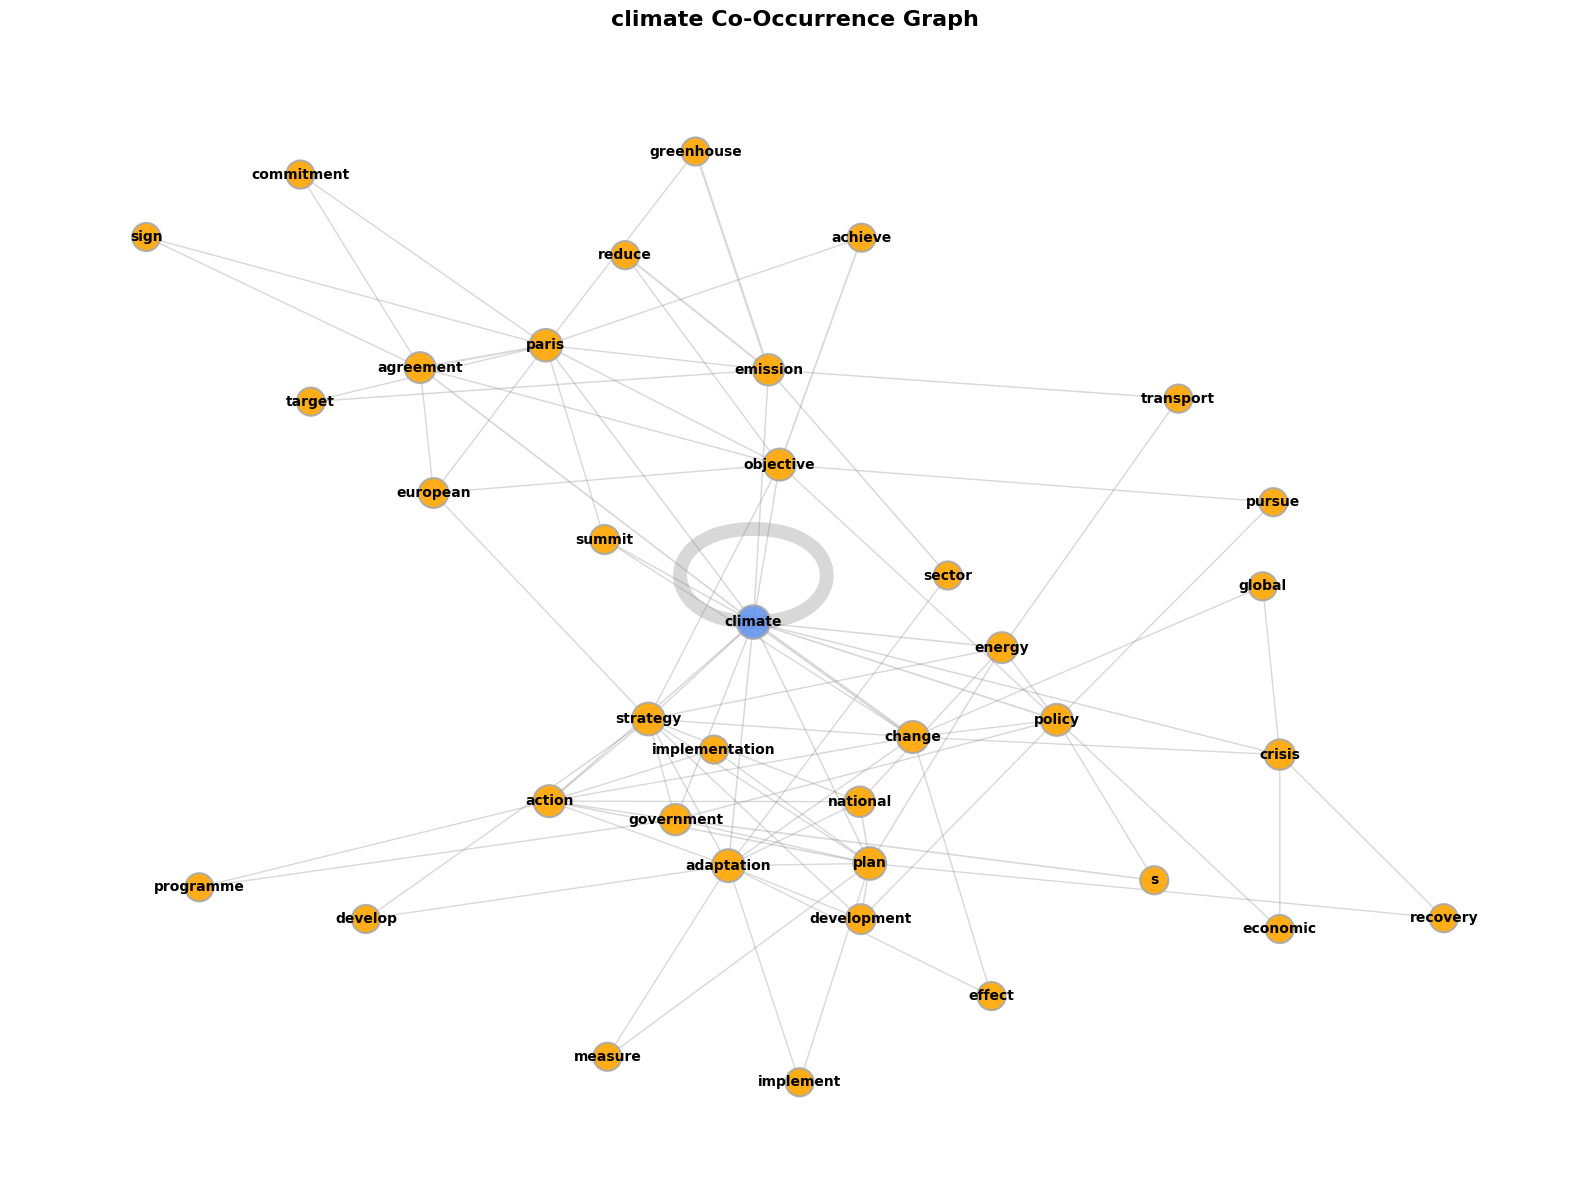


Analysiere Altersgruppe: [1965, 1980)

Anzahl Reden in dieser Gruppe: 23173



100%|██████████| 23173/23173 [00:00<00:00, 69503.46it/s]


CO-OCCURRENCE ANALYSE

1. Satz-Segmentierung...

2. Erstelle binäre Document-Term-Matrix...
Anzahl Sätze: 316175
Anzahl Features: 12465

3. Berechne Co-Occurrence Matrix...

4. Erstelle Netzwerk für Term 'climate'...
   Anzahl Kanten: 225

5. Top 15 Co-Occurrences für 'climate':
   climate                         137825.14
   change                           16465.09
   policy                            4091.08
   agreement                         2545.24
   crisis                            2133.56
   action                            1922.22
   energy                            1659.57
   fight                             1323.61
   paris                             1286.48
   adaptation                        1241.73
   government                        1149.47
   target                            1021.59
   global                            1011.27
   challenge                          977.51
   strategy                           954.39

6. Visualisiere Netzwerk...


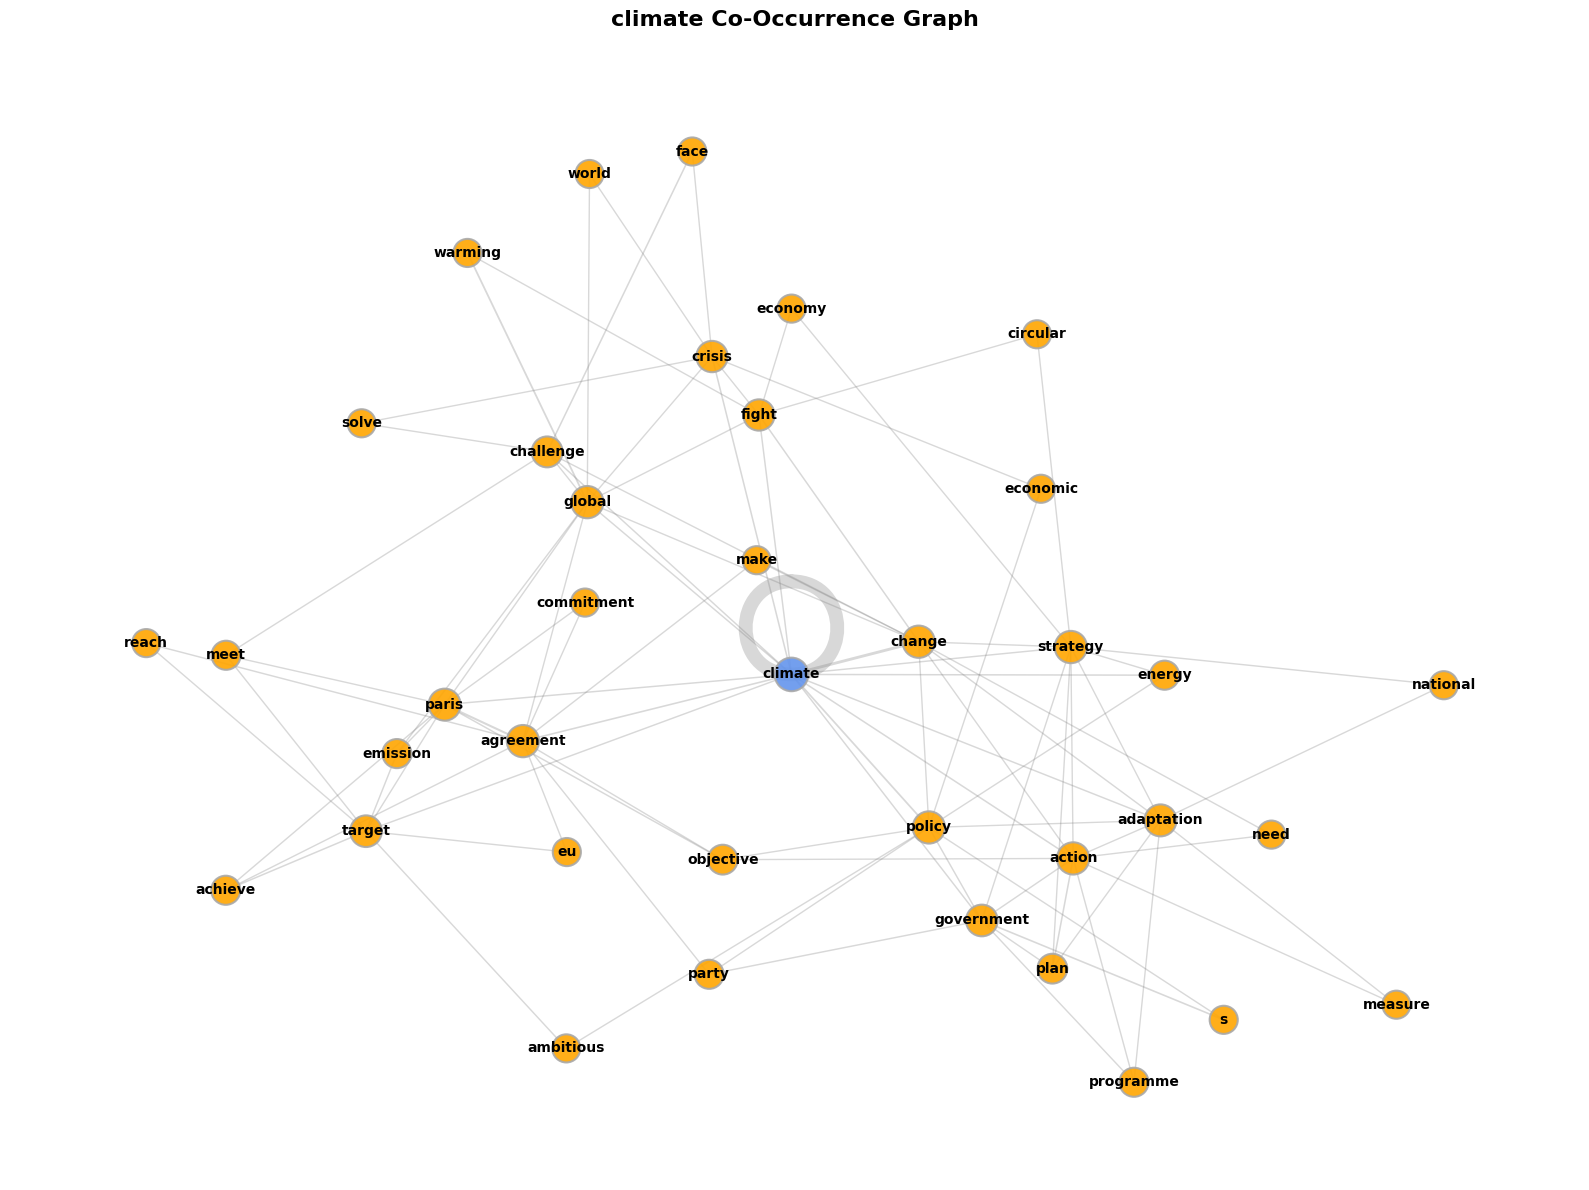


Analysiere Altersgruppe: [1980, 1995)

Anzahl Reden in dieser Gruppe: 9136



100%|██████████| 9136/9136 [00:00<00:00, 67558.46it/s]

CO-OCCURRENCE ANALYSE

1. Satz-Segmentierung...



2. Erstelle binäre Document-Term-Matrix...
Anzahl Sätze: 115596
Anzahl Features: 7675

3. Berechne Co-Occurrence Matrix...

4. Erstelle Netzwerk für Term 'climate'...
   Anzahl Kanten: 225

5. Top 15 Co-Occurrences für 'climate':
   climate                          66414.85
   change                            6869.83
   policy                            3030.49
   agreement                         1163.70
   action                            1064.04
   crisis                            1005.02
   target                             533.95
   fight                              516.23
   government                         513.39
   achieve                            469.24
   paris                              461.84
   adaptation                         443.51
   plan                               431.97
   energy                             349.59
   thank                              343.31

6. Visualisiere Netzwerk...


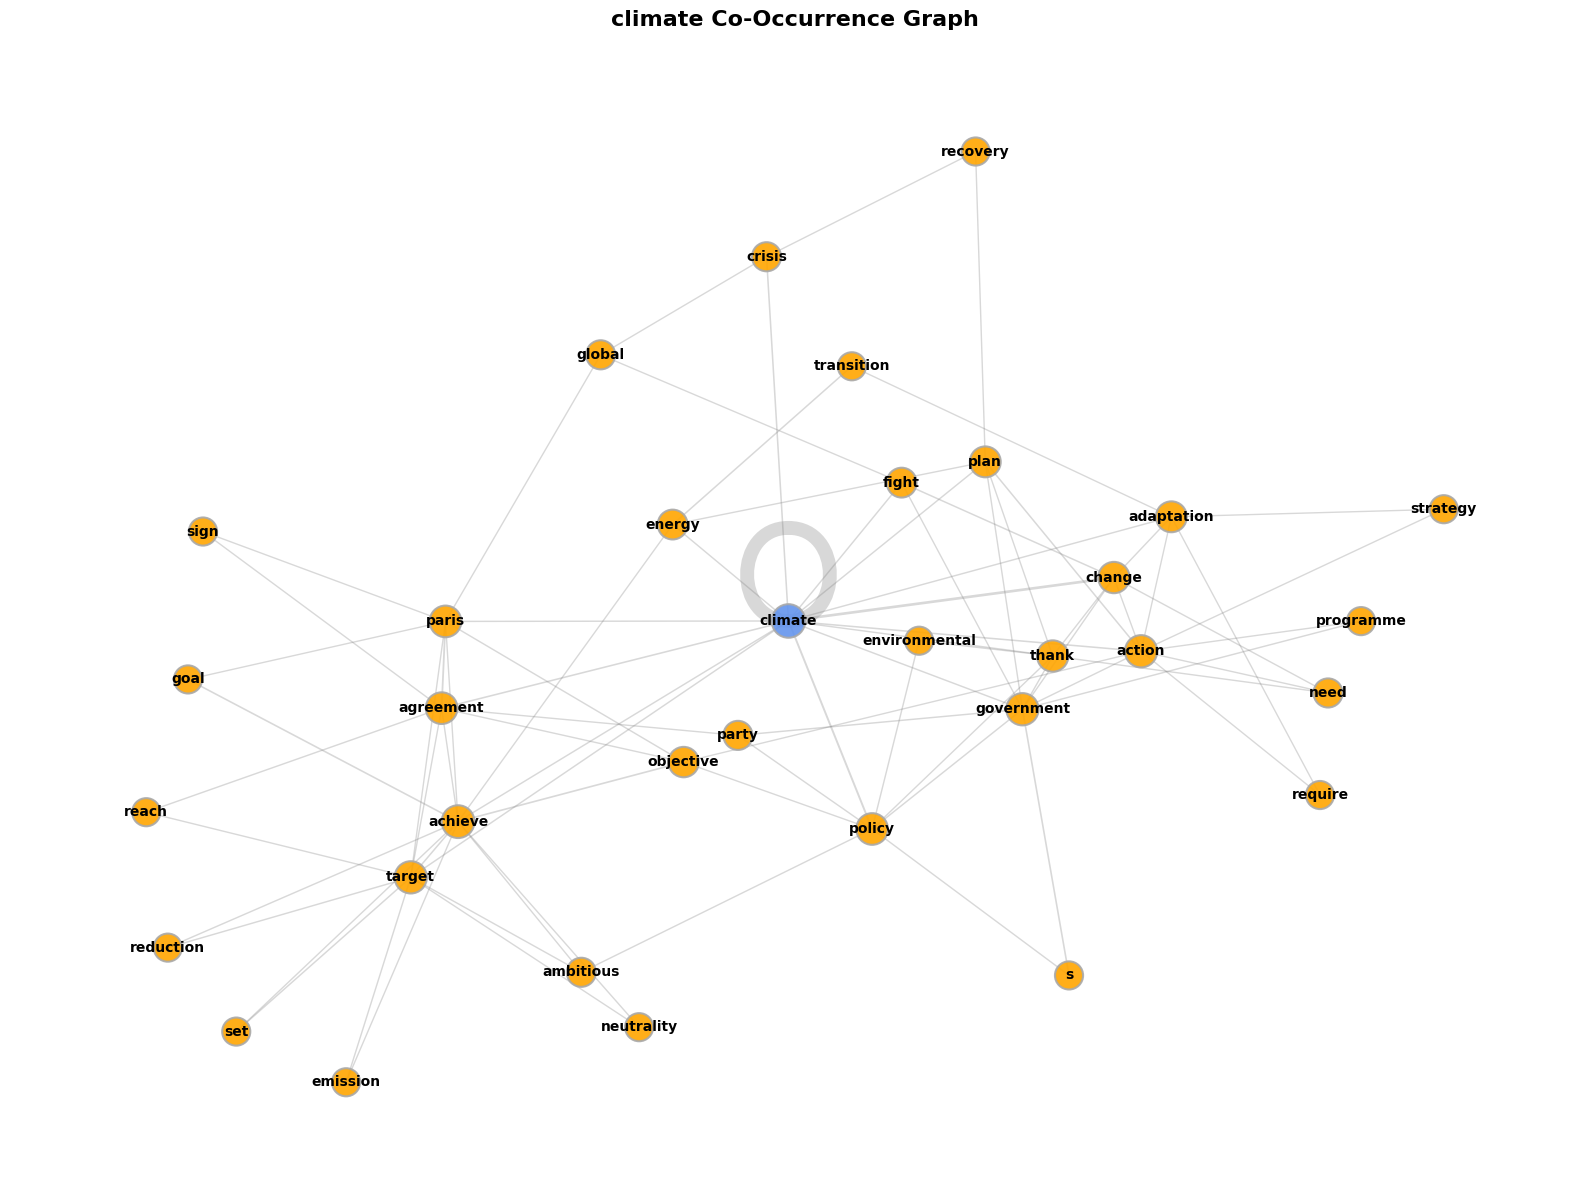


Analysiere Altersgruppe: [1995, 2010)

Anzahl Reden in dieser Gruppe: 37



100%|██████████| 37/37 [00:00<00:00, 40882.31it/s]

CO-OCCURRENCE ANALYSE

1. Satz-Segmentierung...

2. Erstelle binäre Document-Term-Matrix...
Anzahl Sätze: 594
Anzahl Features: 253

3. Berechne Co-Occurrence Matrix...

4. Erstelle Netzwerk für Term 'climate'...
   Anzahl Kanten: 225

5. Top 15 Co-Occurrences für 'climate':
   climate                            616.52
   change                              62.45
   strike                              19.10
   crisis                              16.81
   protection                          16.34
   risk                                15.99
   action                              12.30
   say                                 10.94
   policy                              10.81
   bad                                 10.64
   norway                              10.27
   politician                           8.71
   issue                                8.67
   lead                                 8.67
   create                               7.91

6. Visualisiere Netzwerk...


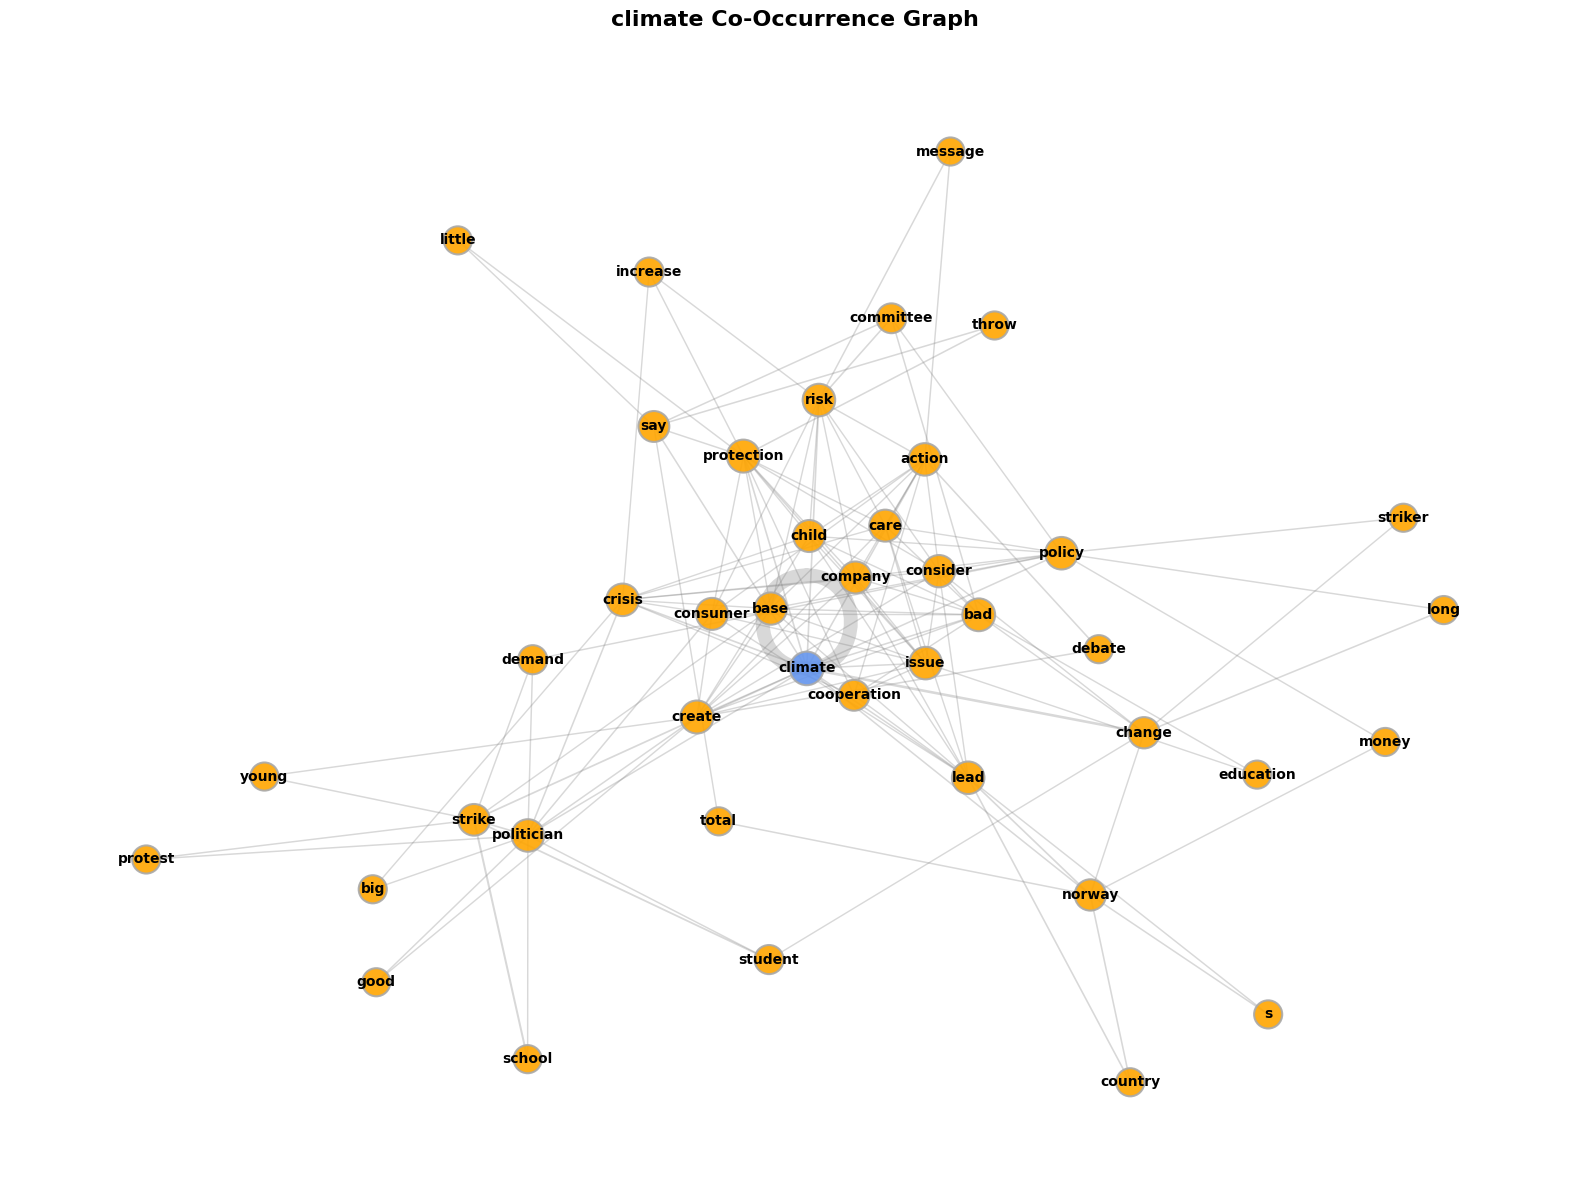

In [32]:
# Alle Alterskategorien durchgehen
for birth_bin in env_cleaned['Birth_Bin'].cat.categories:
    print(f"\n{'='*60}")
    print(f"Analysiere Altersgruppe: {birth_bin}")
    print(f"{'='*60}\n")
    
    # Daten für diese Altersgruppe filtern
    filtered_data = env_cleaned[env_cleaned['Birth_Bin'] == birth_bin]
    
    print(f"Anzahl Reden in dieser Gruppe: {len(filtered_data)}\n")
    
    # Analyse durchführen
    result_graph = analyze_cooccurrences(
        get_documents_for_speeches(filtered_data),  # Gefilterte Daten
        target_term='climate',  # Oder 'carbon', 'emission', etc.
        min_df=5,              # Mindestfrequenz
        num_coocs=15,          # Anzahl Co-Occurrences
        measure='loglik',      # Signifikanz-Maß
        min_degree=2           # Min. Verbindungen für Visualisierung
    )

# Sentiment-Analyse


In [56]:
import pandas as pd
from tqdm import tqdm

def get_speech_sentiment(country: str, year: int, textId: str, docId: str):
    filepath = f"{PARLAMINT_DIR}/ParlaMint-{country}-en.ana/ParlaMint-{country}-en.conllu/{year}/{textId}-ana-meta.tsv"
    df = pd.read_csv(filepath, sep="\t")
    df = df[df['Parent_ID'] == docId]
    senti_counts = df['Senti_3'].value_counts(normalize=True)
    positiv = senti_counts.get('Positive', 0)
    neutral = senti_counts.get('Neutral', 0)
    negativ = senti_counts.get('Negative', 0)
    return (positiv, neutral, negativ)

def get_sentiments(speeches: pd.DataFrame):
    speeches = speeches.copy()
    speeches['positive'] = 0.0
    speeches['neutral'] = 0.0
    speeches['negative'] = 0.0

    for idx, row in tqdm(speeches.iterrows(), total=len(speeches)):
        senti_counts = get_speech_sentiment(row["country"], row["year"], row["Text_ID"], row["ID"])
        speeches.loc[idx, ["positive", "neutral", "negative"]] = senti_counts # type: ignore
    
    return speeches

environment_speeches = merged_df[merged_df["Topic"] == "Environment"]
environment_speeches = get_sentiments(environment_speeches)
environment_speeches


100%|██████████| 62021/62021 [03:23<00:00, 305.38it/s]


,Text_ID,ID,Title,Date,Body,Term,Session,Meeting,Sitting,Agenda,...,country,year,speech_path,country_full,Country,EPS_Score,EPS_category,positive,neutral,negative
144465,ParlaMint-CZ-en_2017-05-25-ps2013-057-07-005-343,ParlaMint-CZ_2017-05-25-ps2013-057-07-005-343.u14,"Parliament of the Czech Republic, Chamber of D...",2017-05-25,Lower house,ps2013,-,ps2013/057,ps2013/057/07,-,...,CZ,2017,/ParlaMint-CZ-en.ana/ParlaMint-CZ-en.txt/2017/...,Czechia,Czechia,42.888889,low,1.000000,0.000000,0.000000
144932,ParlaMint-CZ-en_2017-02-23-ps2013-055-03-009-294,ParlaMint-CZ_2017-02-23-ps2013-055-03-009-294....,"Parliament of the Czech Republic, Chamber of D...",2017-02-23,Lower house,ps2013,-,ps2013/055,ps2013/055/03,-,...,CZ,2017,/ParlaMint-CZ-en.ana/ParlaMint-CZ-en.txt/2017/...,Czechia,Czechia,42.888889,low,0.400000,0.600000,0.000000
144933,ParlaMint-CZ-en_2017-02-23-ps2013-055-03-009-294,ParlaMint-CZ_2017-02-23-ps2013-055-03-009-294....,"Parliament of the Czech Republic, Chamber of D...",2017-02-23,Lower house,ps2013,-,ps2013/055,ps2013/055/03,-,...,CZ,2017,/ParlaMint-CZ-en.ana/ParlaMint-CZ-en.txt/2017/...,Czechia,Czechia,42.888889,low,0.272727,0.272727,0.454545
144934,ParlaMint-CZ-en_2017-02-23-ps2013-055-03-009-294,ParlaMint-CZ_2017-02-23-ps2013-055-03-009-294....,"Parliament of the Czech Republic, Chamber of D...",2017-02-23,Lower house,ps2013,-,ps2013/055,ps2013/055/03,-,...,CZ,2017,/ParlaMint-CZ-en.ana/ParlaMint-CZ-en.txt/2017/...,Czechia,Czechia,42.888889,low,0.666667,0.333333,0.000000
144935,ParlaMint-CZ-en_2017-02-23-ps2013-055-03-009-294,ParlaMint-CZ_2017-02-23-ps2013-055-03-009-294....,"Parliament of the Czech Republic, Chamber of D...",2017-02-23,Lower house,ps2013,-,ps2013/055,ps2013/055/03,-,...,CZ,2017,/ParlaMint-CZ-en.ana/ParlaMint-CZ-en.txt/2017/...,Czechia,Czechia,42.888889,low,0.428571,0.357143,0.214286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3411113,ParlaMint-NL-en_2020-03-10-eerstekamer-8,ParlaMint-NL_2020-03-10-eerstekamer-8.u43,Report of the meeting of the Dutch Upper House...,2020-03-10,Upper house,Meeting of the 36th Eerste Kamer,Session 8,Meeting 23,Sitting 2020-03-10,-,...,NL,2020,/ParlaMint-NL-en.ana/ParlaMint-NL-en.txt/2020/...,Netherlands,Netherlands,54.888889,mid,0.000000,0.500000,0.500000
3411134,ParlaMint-NL-en_2020-03-10-eerstekamer-8,ParlaMint-NL_2020-03-10-eerstekamer-8.u64,Report of the meeting of the Dutch Upper House...,2020-03-10,Upper house,Meeting of the 36th Eerste Kamer,Session 8,Meeting 23,Sitting 2020-03-10,-,...,NL,2020,/ParlaMint-NL-en.ana/ParlaMint-NL-en.txt/2020/...,Netherlands,Netherlands,54.888889,mid,0.000000,0.250000,0.750000
3411199,ParlaMint-NL-en_2020-03-10-eerstekamer-8,ParlaMint-NL_2020-03-10-eerstekamer-8.u129,Report of the meeting of the Dutch Upper House...,2020-03-10,Upper house,Meeting of the 36th Eerste Kamer,Session 8,Meeting 23,Sitting 2020-03-10,-,...,NL,2020,/ParlaMint-NL-en.ana/ParlaMint-NL-en.txt/2020/...,Netherlands,Netherlands,54.888889,mid,0.000000,0.333333,0.666667
3411277,ParlaMint-NL-en_2020-03-10-eerstekamer-8,ParlaMint-NL_2020-03-10-eerstekamer-8.u207,Report of the meeting of the Dutch Upper House...,2020-03-10,Upper house,Meeting of the 36th Eerste Kamer,Session 8,Meeting 23,Sitting 2020-03-10,-,...,NL,2020,/ParlaMint-NL-en.ana/ParlaMint-NL-en.txt/2020/...,Netherlands,Netherlands,54.888889,mid,0.387097,0.483871,0.129032


<Axes: >

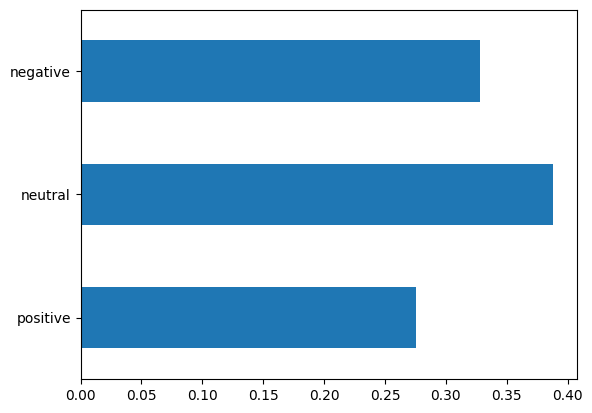

In [61]:
environment_speeches[['positive', 'neutral', 'negative']].mean().plot.barh()

<Axes: ylabel='Birth_Bin'>

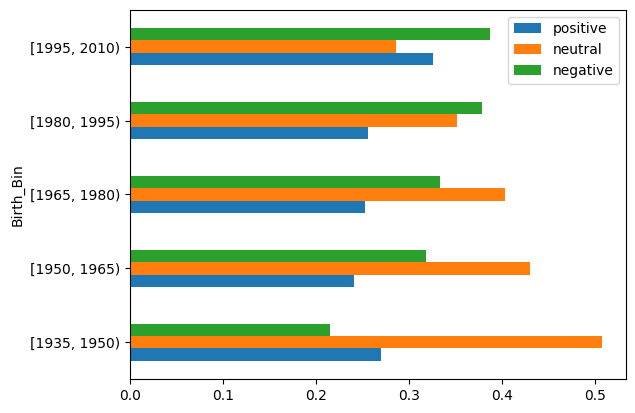

In [70]:
env_cleaned = environment_speeches.copy()
env_cleaned = env_cleaned[env_cleaned['Speaker_birth'] != "-"]
env_cleaned['Speaker_birth'] = env_cleaned['Speaker_birth'].astype(int)
min_y = env_cleaned['Speaker_birth'].min()
max_y = env_cleaned['Speaker_birth'].max()
bins = np.arange(min_y, max_y + 16, 15)
env_cleaned['Birth_Bin'] = pd.cut(env_cleaned['Speaker_birth'], bins=bins, right=False)

env_cleaned.groupby(by="Birth_Bin", observed=True).agg({
  "positive": "mean",
  "neutral": "mean",
  "negative": "mean",
}).sort_index().plot.barh()

In [ ]:
environment_speeches.groupby(by="EPS_category", observed=True).agg({
  "positive": "mean",
  "neutral": "mean",
  "negative": "mean",
}).sort_index().plot.barh()

In [ ]:
environment_speeches[
    environment_speeches["Party_orientation"].isin(["Left", "Centre", "Right"])
].groupby(by="Party_orientation", observed=True).agg({
  "positive": "mean",
  "neutral": "mean",
  "negative": "mean",
}).sort_index().plot.barh()

In [ ]:
environment_speeches.groupby(by="Party_status", observed=True).agg({
  "positive": "mean",
  "neutral": "mean",
  "negative": "mean",
}).sort_index().plot.barh()

<Axes: ylabel='country'>

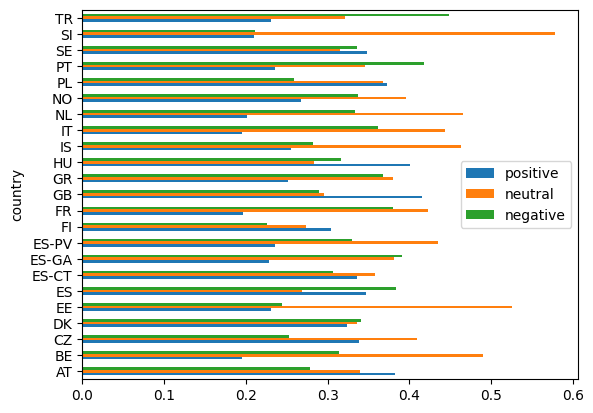

In [71]:
environment_speeches.groupby(by="country", observed=True).agg({
  "positive": "mean",
  "neutral": "mean",
  "negative": "mean",
}).sort_index().plot.barh()